# IAU - Project

**Authors:** Peter Mačinec, Lukáš Janík

## Setup and import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import scipy.stats as stats

# statistics tools
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
from scipy.stats import anderson, mannwhitneyu

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Read the data

Data are divided into two files, *personal* and *other*, so we need to read both of them:

In [2]:
# read datasets
df1 = pd.read_csv('data/personal_train.csv', index_col=0)
df2 = pd.read_csv('data/other_train.csv', index_col=0)

## Basic analysis

At first, let's check number of records in each dataframe:

In [3]:
# dataframe with personal information
len(df1)

2237

In [4]:
# dataframe with other information
len(df2)

2287

#### Basic look at the data

In [5]:
df1.head()

name 
 address 
 age 
 sex 
 date_of_birth 
 
 
 
 
 0 
 Terry Terry 
 11818 Lori Crossing Apt. 802\r\nPughstad, DC 7... 
 63.0 
 M 
 1955-09-12 
 
 
 1 
 Edith Boudreaux 
 PSC 4657, Box 5446\r\nAPO AP 58412 
 73.0 
 F 
 1945/04/30 
 
 
 2 
 Janet Washington 
 Unit 9759 Box 9470\r\nDPO AP 45549 
 74.0 
 F 
 1944-06-06 
 
 
 3 
 Margaret Chabot 
 137 Lewis Flat Suite 762\r\nWest Elizabeth, AL... 
 49.0 
 F 
 1969-10-01 
 
 
 4 
 Colleen Satterwhite 
 995 Frank Stravenue\r\nSouth Matthewport, TX 8... 
 2.0 
 F 
 2016-01-08

In [6]:
df2.head()

name 
 address 
 query hyperthyroid 
 T4U measured 
 FTI measured 
 lithium 
 TT4 
 T4U 
 capital-loss 
 capital-gain 
 ... 
 personal_info 
 T3 measured 
 on antithyroid medication 
 referral source 
 education-num 
 psych 
 occupation 
 TBG measured 
 TBG 
 pregnant 
 
 
 
 
 0 
 Frances Pryor 
 3060 Abigail Hollow\r\nLake Christopherchester... 
 f 
 t 
 t 
 f 
 120.0 
 0.82 
 0.0 
 0.0 
 ... 
 White|United-States\r\nBachelors -- Separated|... 
 t 
 f 
 other 
 13.0 
 f 
 Prof-specialty 
 f 
 ? 
 NaN 
 
 
 1 
 Marta Drees 
 05614 Robert Keys Suite 721\r\nHarrisbury, UT ... 
 t 
 t 
 t 
 f 
 93.0 
 1.14 
 0.0 
 0.0 
 ... 
 White|United-States\r\nSome_college -- Never-m... 
 t 
 f 
 other 
 10.0 
 f 
 Other-service 
 f 
 ? 
 f 
 
 
 2 
 George Currie 
 238 Schultz Cape\r\nNew Emilyton, AL 99522 
 f 
 t 
 t 
 f 
 100.0 
 0.88 
 0.0 
 0.0 
 ... 
 White|United-States\r\nHS-grad -- Never-marrie... 
 t 
 f 
 other 
 9.0 
 f 
 Machine-op-inspct 
 f 
 ? 
 f 
 
 
 3 
 James Reynolds 
 6509 Matthew Ville\r\nThomasfort, VA 84634 
 f 
 t 
 t 
 f 
 86.0 
 0.92 
 0.0 
 0.0 
 ... 
 White|Mexico\r\nHS-grad -- Married-civ-spouse|... 
 t 
 f 
 other 
 9.0 
 f 
 Machine-op-inspct 
 f 
 ? 
 f 
 
 
 4 
 Jolene Tompkins 
 85046 Wilkins Expressway Suite 780\r\nErictown... 
 f 
 t 
 t 
 f 
 167.0 
 1.21 
 0.0 
 0.0 
 ... 
 White|United-States\r\nHS-grad -- Never-marrie... 
 t 
 f 
 other 
 9.0 
 f 
 Adm-clerical 
 f 
 ? 
 f 
 
 
 
 5 rows × 38 columns

#### More interesting information about data

Datatypes check:

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 5 columns):
name             2237 non-null object
address          2237 non-null object
age              2236 non-null float64
sex              2237 non-null object
date_of_birth    2236 non-null object
dtypes: float64(1), object(4)
memory usage: 104.9+ KB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2287 entries, 0 to 2286
Data columns (total 38 columns):
name                         2287 non-null object
address                      2287 non-null object
query hyperthyroid           2275 non-null object
T4U measured                 2276 non-null object
FTI measured                 2275 non-null object
lithium                      2282 non-null object
TT4                          2125 non-null float64
T4U                          2041 non-null float64
capital-loss                 2281 non-null float64
capital-gain                 2276 non-null float64
query hypothyroid            2282 non-null object
on thyroxine                 2282 non-null object
tumor                        2281 non-null object
TSH                          2042 non-null float64
T3                           1798 non-null float64
fnlwgt                       2279 non-null float64
FTI                          2278 non-null object
hours-per-week               2278 no

Some interesting statistics for each column:

In [9]:
df1.describe(include='all')

name 
 address 
 age 
 sex 
 date_of_birth 
 
 
 
 
 count 
 2237 
 2237 
 2236.000000 
 2237 
 2236 
 
 
 unique 
 2236 
 2237 
 NaN 
 3 
 2175 
 
 
 top 
 Terry Murphy 
 803 Smith Crest\r\nBurgessfurt, MA 05696 
 NaN 
 F 
 1958-10-21 
 
 
 freq 
 2 
 1 
 NaN 
 1448 
 3 
 
 
 mean 
 NaN 
 NaN 
 51.822004 
 NaN 
 NaN 
 
 
 std 
 NaN 
 NaN 
 20.884439 
 NaN 
 NaN 
 
 
 min 
 NaN 
 NaN 
 1.000000 
 NaN 
 NaN 
 
 
 25% 
 NaN 
 NaN 
 36.000000 
 NaN 
 NaN 
 
 
 50% 
 NaN 
 NaN 
 54.000000 
 NaN 
 NaN 
 
 
 75% 
 NaN 
 NaN 
 67.000000 
 NaN 
 NaN 
 
 
 max 
 NaN 
 NaN 
 455.000000 
 NaN 
 NaN

In [10]:
df2.describe(include='all')

name 
 address 
 query hyperthyroid 
 T4U measured 
 FTI measured 
 lithium 
 TT4 
 T4U 
 capital-loss 
 capital-gain 
 ... 
 personal_info 
 T3 measured 
 on antithyroid medication 
 referral source 
 education-num 
 psych 
 occupation 
 TBG measured 
 TBG 
 pregnant 
 
 
 
 
 count 
 2287 
 2287 
 2275 
 2276 
 2275 
 2282 
 2125.000000 
 2041.000000 
 2281.000000 
 2276.000000 
 ... 
 2283 
 2284 
 2278 
 2282 
 2052.000000 
 2279 
 2279 
 2273 
 2277 
 2124 
 
 
 unique 
 2236 
 2237 
 3 
 3 
 3 
 3 
 NaN 
 NaN 
 NaN 
 NaN 
 ... 
 557 
 3 
 3 
 5 
 NaN 
 3 
 14 
 2 
 1 
 4 
 
 
 top 
 Annette Hunt 
 87029 Richard Burgs\r\nChavezshire, MI 83391 
 f 
 t 
 t 
 f 
 NaN 
 NaN 
 NaN 
 NaN 
 ... 
 White|United-States\r\nHS-grad -- Married-civ-... 
 t 
 f 
 other 
 NaN 
 f 
 Adm-clerical 
 f 
 ? 
 f 
 
 
 freq 
 2 
 2 
 2135 
 2035 
 2035 
 2269 
 NaN 
 NaN 
 NaN 
 NaN 
 ... 
 133 
 1800 
 2250 
 1328 
 NaN 
 2167 
 383 
 2272 
 2277 
 2020 
 
 
 mean 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 109.540424 
 0.997224 
 70.472600 
 1084.970562 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 5.419591 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 std 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 35.917648 
 0.192969 
 363.415412 
 7874.282515 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 329.113932 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 min 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 2.000000 
 0.310000 
 0.000000 
 0.000000 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 -1600.000000 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 25% 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 88.000000 
 0.880000 
 0.000000 
 0.000000 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 9.000000 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 50% 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 104.000000 
 0.980000 
 0.000000 
 0.000000 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 10.000000 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 75% 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 125.000000 
 1.080000 
 0.000000 
 0.000000 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 12.000000 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 max 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 430.000000 
 2.120000 
 3683.000000 
 99999.000000 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 1600.000000 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 
 11 rows × 38 columns

#### NaN values in data

Are there any missing values?

In [11]:
df1.isnull().values.any(), df2.isnull().values.any()

(True, True)

Missing values per each column would tell something more:

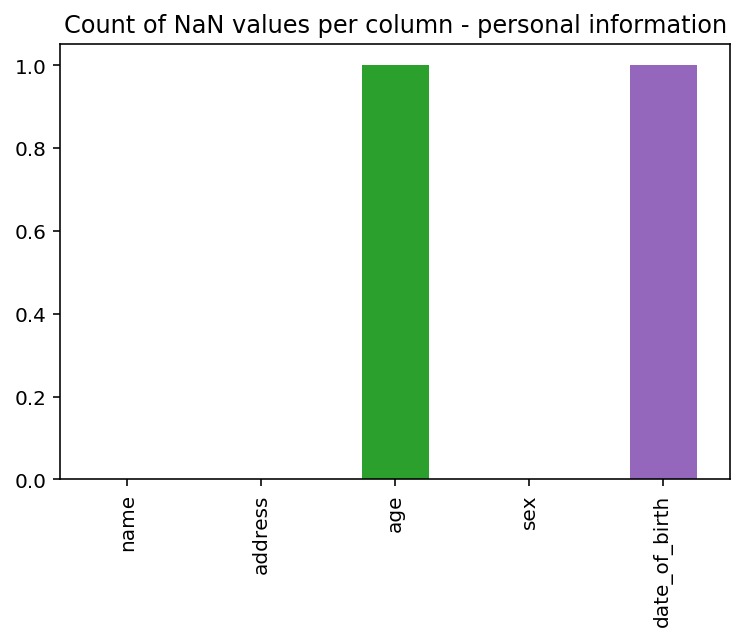

In [12]:
df1.isnull().sum().plot(kind='bar', title='Count of NaN values per column - personal information')

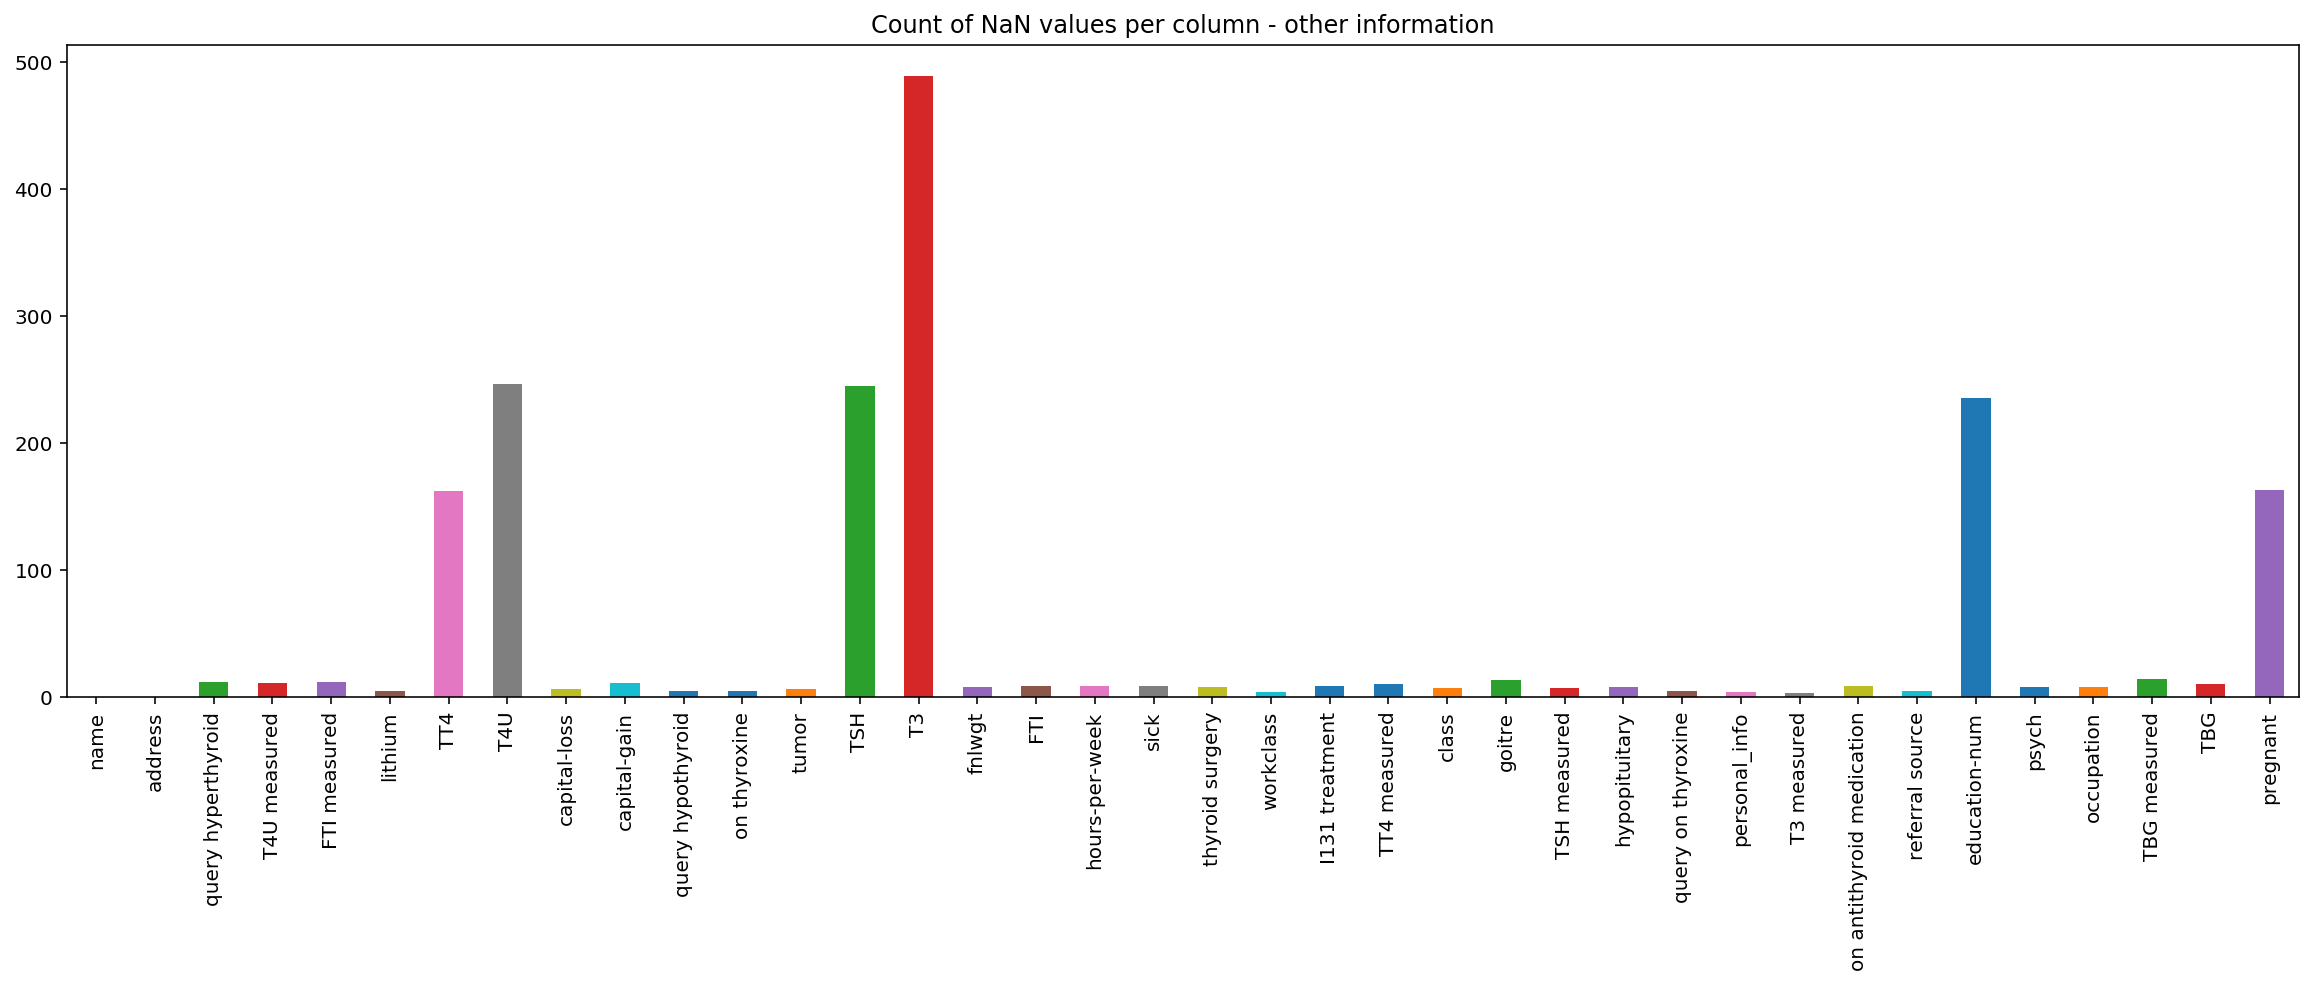

In [13]:
plt.rcParams['figure.figsize'] = (20, 6)
df2.isnull().sum().plot(kind='bar', title='Count of NaN values per column - other information')
plt.rcParams['figure.figsize'] = (5, 4)

## Attribute analysis

#### Setup for attribute analysis

For our analysis, some auxiliary functions would be helpful:

In [14]:
def grouped_barplot(df, attribute, groupby, title=None, size=(5, 4), rotation=0):
    """Draw barplot of attribute, grouped by another attribute."""
    plt.rcParams['figure.figsize'] = size
    data = df.groupby(groupby)[attribute].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
    sns.barplot(attribute, 'percentage', hue=groupby, data=data)
    plt.xticks(rotation=rotation)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.rcParams['figure.figsize'] = (5, 4)
    
def pie_plot(df, column, title=None, size=(5, 4)):
    """Draw pie plot with percentage of each value."""
    values = [len(df[df[column] == x]) for x in df[column].unique() if x != None]
    labels = [x for x in df[column].unique() if x != None]
    plt.rcParams['figure.figsize'] = size
    plt.pie(x = values, labels = labels, autopct='%1.2f%%')
    plt.title(title)
    plt.rcParams['figure.figsize'] = (5, 4)
    
def grouped_kdeplot(df, column, groupby, rotation=0):
    """Draw kdeplot of attribute, grouped by another attribute."""
    for x in df[groupby].unique():
        sns.kdeplot(df[df[groupby] == x][column], shade=True, shade_lowest=False)
    plt.xticks(rotation=rotation)
    
def unify_boolean(x):
    """Function for unifying boolean values in columns."""
    x = x.lower()
    if x.startswith('f'):
        return 'f'
    if x.startswith('t'):
        return 't'
    
    return None

def unify_words(x):
    """Function for unifying the words differing only in separator."""
    x = x.lower()
    return x.replace('_','-')

#### Dependant variable - class (diagnose)

First, let's take a look at the values and distribution of dependant variable *class*

In [15]:
df2['class'].head()

0                        negative.|1
1                     Negative.|2528
2                      negative.|208
3                     Negative.|1891
4    Increased binding protein.|2245
Name: class, dtype: object

There seem to be several groups, represented by different strings. We need to check, how many unique values are there:

In [16]:
print("Number of unique values in 'class' column: " + str(len(df2['class'].unique())))

Number of unique values in 'class' column: 2238


There are a lot of unique values! Let's create column 'class_status' based on values before '.' and unify to lower case:

In [17]:
df2['class_status'] = df2['class'].str.extract('(^[^.]+)', expand=False).str.strip().str.lower()

Now, our *class* would be fixed, let's take a look at it:

In [18]:
df2['class_status'].unique()

array(['negative', 'increased binding protein',
       'decreased binding protein', nan], dtype=object)

Finally, there are just three groups, so we can check the distribution of each class now:

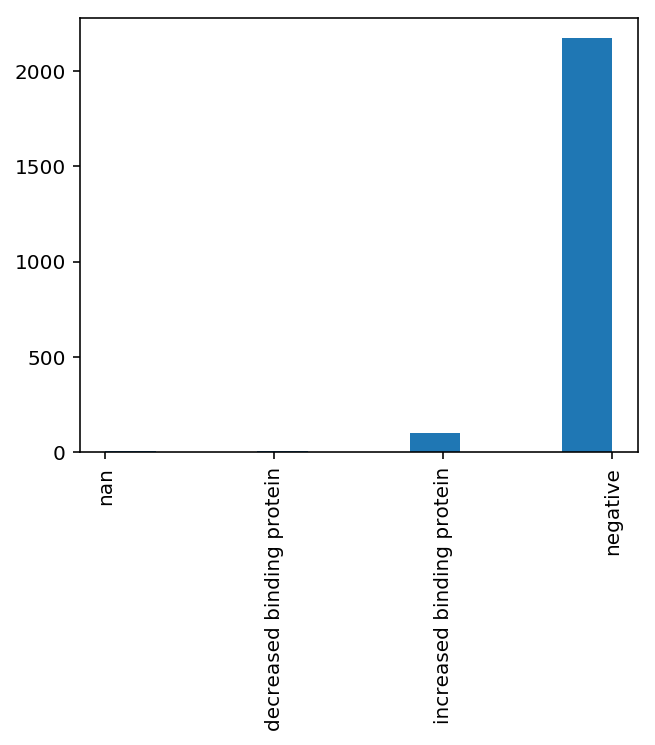

In [19]:
plt.hist(df2['class_status'])
plt.xticks(rotation=90)
plt.show()

### Personal information dataset

#### Name

For *name* attribute, it can be just interesting to check if there are some duplicates or even namesakes:

In [20]:
# check all duplicates in names
df1[df1.duplicated('name')].name

985    Terry Murphy
Name: name, dtype: object

In [21]:
# find all duplicates to check, if they are the same or just namesakes
df1[df1.name == 'Terry Murphy']

name 
 address 
 age 
 sex 
 date_of_birth 
 
 
 
 
 667 
 Terry Murphy 
 77362 Hernandez Plains\r\nPriscillaburgh, IL 3... 
 25.0 
 F 
 1993-06-30 
 
 
 985 
 Terry Murphy 
 USNV Armstrong\r\nFPO AE 59966 
 63.0 
 ? 
 1955-06-03

#### Age

Age can help in predicting if patient is ill or not. For now, let's check age distribution at least:

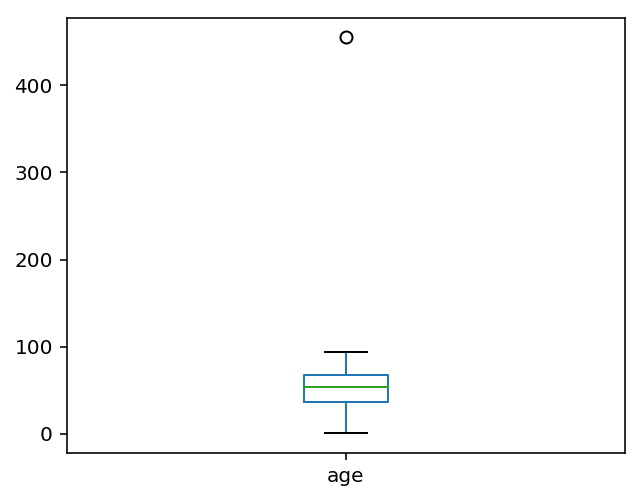

In [22]:
df1['age'].plot.box()

There we can see one outlier, but other values look correct. From analysis above, there should be also one row without age value. Maybe, we can calculate age from *date_of_birth* attribute:

In [23]:
df1[df1['age'].isnull()]

name 
 address 
 age 
 sex 
 date_of_birth 
 
 
 
 
 119 
 Frances Pryor 
 3060 Abigail Hollow\r\nLake Christopherchester... 
 NaN 
 F 
 NaN

Unfortunately, also *date_of_birth* is null, so we can't calculate his age.

#### Sex

Check distribution of men and women in our dataset:

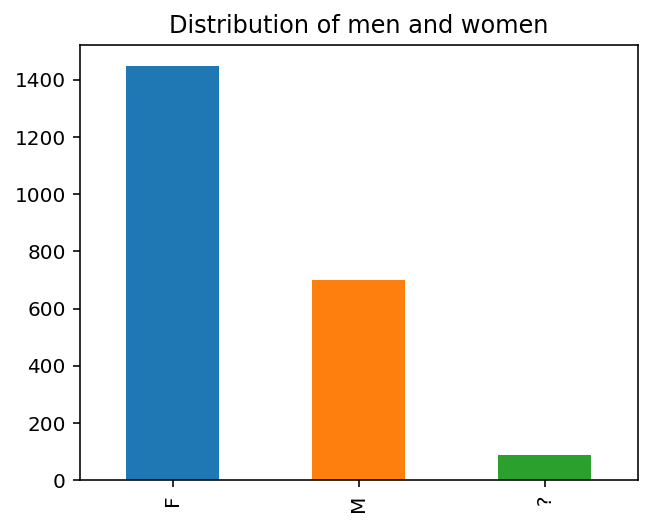

In [24]:
df1['sex'].value_counts().plot(kind='bar', title='Distribution of men and women')

Also pie chart can be interesting:

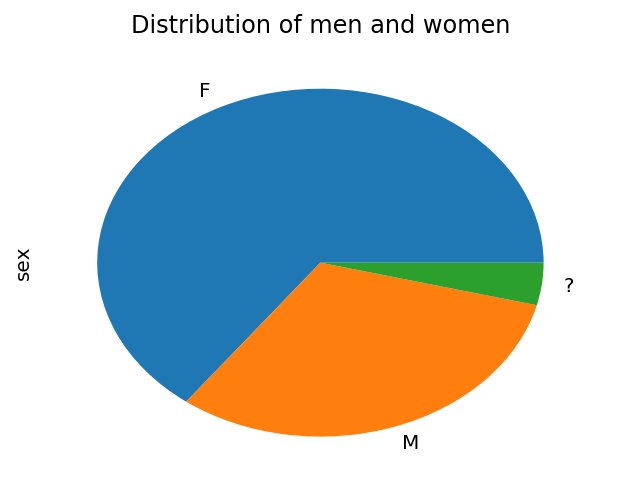

In [25]:
df1['sex'].value_counts().plot(kind='pie', title='Distribution of men and women')

From charts above, we can say there are significantly more women than men. There are also some values with **?**, that probably means NaN values.

In [26]:
df1[df1.sex == '?'].head()

name 
 address 
 age 
 sex 
 date_of_birth 
 
 
 
 
 35 
 Shannon Murray 
 USCGC Steele\r\nFPO AA 97314 
 59.0 
 ? 
 1959-06-17 
 
 
 69 
 Daniel Lawson 
 8983 Jacob Unions Suite 081\r\nCharlesville, M... 
 78.0 
 ? 
 1939-12-08 
 
 
 97 
 Todd Begum 
 Unit 6765 Box 0902\r\nDPO AE 07079 
 47.0 
 ? 
 1971-10-11 
 
 
 105 
 Scott Acevedo 
 893 Blevins Port\r\nEast Kimberlyburgh, SC 50299 
 71.0 
 ? 
 1947-06-27 
 
 
 116 
 George Stringham 
 8433 Moore Fords Suite 817\r\nThomasside, TX 6... 
 18.0 
 ? 
 2000-01-25

#### Date of birth, Address

Those two values are probably not going to help us with classification and predicting the diagnosis of patient, so we are not going to analyse them properly. But *address* and *name* would be very useful for merging two dataframes - name and address are the best identifiers of person that are included in both datasets.

### Medical information dataset

#### Name, Address

Those two values, again, will be used probably just for merging our two datasets, but will not help us to predict wether is patient ill or not. At least, duplicates may be checked.

How many of unique duplicates are there?

In [27]:
len(df2[df2.duplicated(['name', 'address'])])

50

And also count of duplicates is important:

In [28]:
duplicates = df2[df2.duplicated(['name', 'address'], keep=False)].sort_values('name')
len(duplicates)

100

Let's check some of them:

In [29]:
duplicates.head()

name 
 address 
 query hyperthyroid 
 T4U measured 
 FTI measured 
 lithium 
 TT4 
 T4U 
 capital-loss 
 capital-gain 
 ... 
 T3 measured 
 on antithyroid medication 
 referral source 
 education-num 
 psych 
 occupation 
 TBG measured 
 TBG 
 pregnant 
 class_status 
 
 
 
 
 1259 
 Alfred Still 
 4175 Smith Keys\r\nNew Taylor, NH 39815 
 f 
 t 
 t 
 f 
 82.0 
 1.07 
 0.0 
 0.0 
 ... 
 f 
 f 
 other 
 13.0 
 f 
 Prof-specialty 
 f 
 ? 
 f 
 negative 
 
 
 1070 
 Alfred Still 
 4175 Smith Keys\r\nNew Taylor, NH 39815 
 NaN 
 t 
 t 
 f 
 82.0 
 1.07 
 0.0 
 0.0 
 ... 
 f 
 NaN 
 other 
 13.0 
 f 
 Prof-specialty 
 NaN 
 ? 
 f 
 negative 
 
 
 1549 
 Amelia Rodriguez 
 087 Gary Port\r\nWest Sarah, KY 66896 
 f 
 NaN 
 t 
 f 
 84.0 
 0.87 
 0.0 
 NaN 
 ... 
 t 
 f 
 SVI 
 NaN 
 f 
 Sales 
 f 
 ? 
 f 
 negative 
 
 
 968 
 Amelia Rodriguez 
 087 Gary Port\r\nWest Sarah, KY 66896 
 f 
 t 
 t 
 f 
 84.0 
 0.87 
 0.0 
 0.0 
 ... 
 t 
 f 
 SVI 
 NaN 
 f 
 Sales 
 f 
 ? 
 f 
 negative 
 
 
 2144 
 Angela Boyer 
 3750 Chen Groves\r\nPamelatown, ME 02894 
 NaN 
 NaN 
 t 
 f 
 92.0 
 1.03 
 0.0 
 NaN 
 ... 
 t 
 f 
 SVI 
 9.0 
 f 
 Priv-house-serv 
 f 
 ? 
 f 
 negative 
 
 
 
 5 rows × 39 columns

We can see there are  duplicates that have the same name and address, so in preprocessing, we should do something with that.

#### Query hyperthyroid

Let's look at unique values:

In [30]:
df2['query hyperthyroid'].unique()

array(['f', 't', nan, 'f.8'], dtype=object)

We can see there are probably boolean values, but represented by more labels. Unifying them would be helpful:

In [31]:
df2['query hyperthyroid'] = df2['query hyperthyroid'].apply(lambda x: unify_boolean(str(x)))

After unifying, let's take a look at distribution of boolean values for hyperthroid query:

In [32]:
pd.crosstab(df2['query hyperthyroid'], df2.class_status)

class_status 
 decreased binding protein 
 increased binding protein 
 negative 
 
 
 query hyperthyroid 
 
 
 
 
 
 
 
 f 
 9 
 85 
 2036 
 
 
 t 
 0 
 16 
 122

Visualization of distributions would shows something more. Let's visualize distribution of boolean values for whole data and then, grouped by *class_status* values.

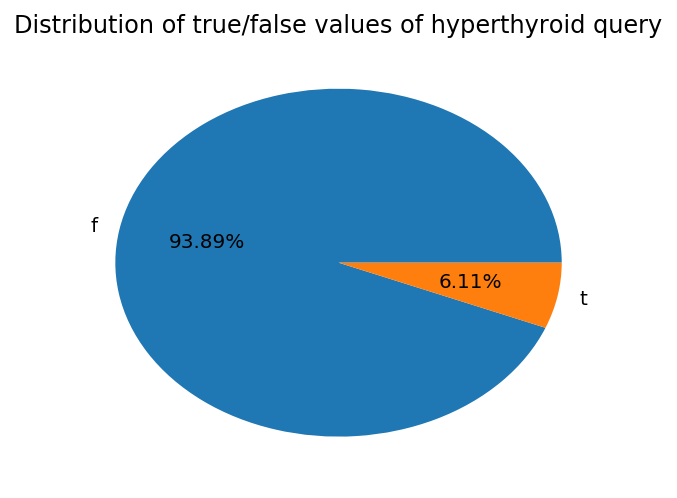

In [33]:
pie_plot(df2, 'query hyperthyroid', title='Distribution of true/false values of hyperthyroid query')

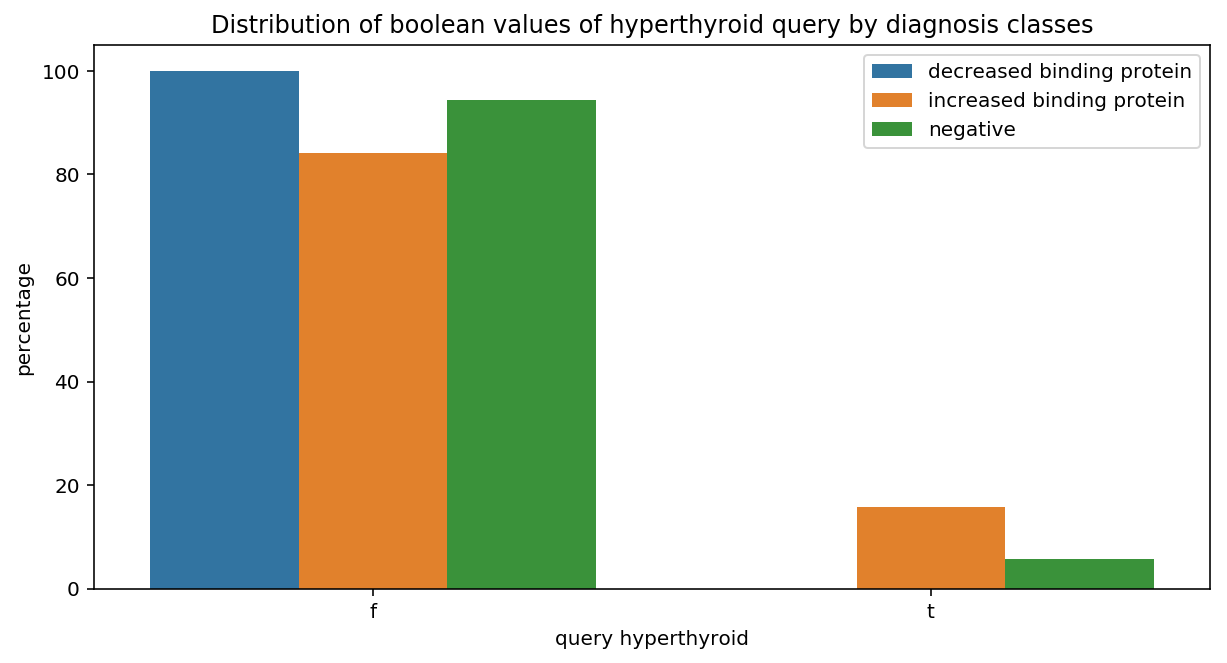

In [34]:
grouped_barplot(df2, 'query hyperthyroid', 'class_status', title='Distribution of boolean values of hyperthyroid query by diagnosis classes', size=(10,5))

From the barplot above, we can see some difference in value distributions through classes.

#### T4U measured

Again, let's do the same analysis:

In [35]:
df2['T4U measured'].unique()

array(['t', 'f', nan, 't.3'], dtype=object)

In [36]:
# again, fix problem with boolean unifying
df2['T4U measured'] = df2['T4U measured'].apply(lambda x: unify_boolean(str(x)))


Let's check values distribution through classes:

In [37]:
pd.crosstab(df2['T4U measured'], df2.class_status)

class_status 
 decreased binding protein 
 increased binding protein 
 negative 
 
 
 T4U measured 
 
 
 
 
 
 
 
 f 
 0 
 2 
 237 
 
 
 t 
 9 
 99 
 1922

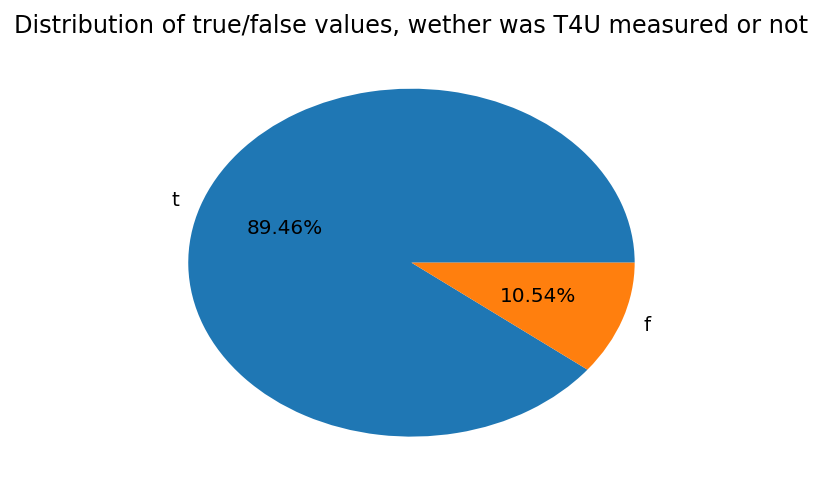

In [38]:
pie_plot(df2, 'T4U measured', title='Distribution of true/false values, wether was T4U measured or not')

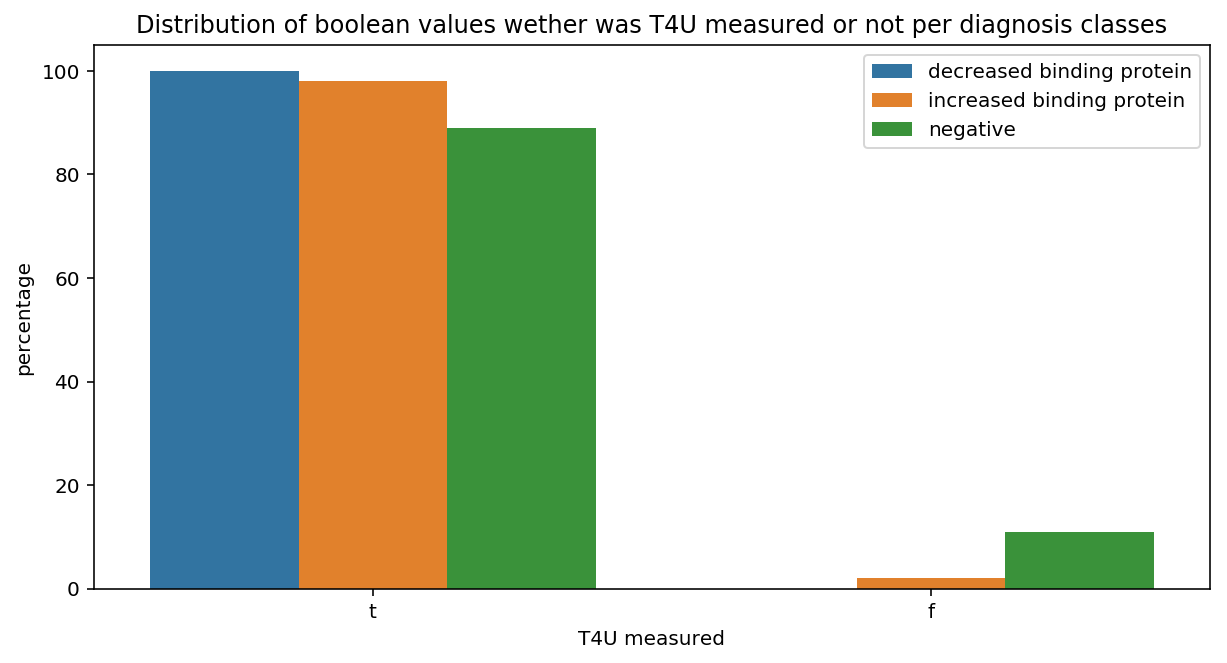

In [39]:
grouped_barplot(df2, 'T4U measured', 'class_status', title='Distribution of boolean values wether was T4U measured or not per diagnosis classes', size=(10,5))

From the graphs (of this attribute) above we can see just small differences (< ~10%) in value distributions through classes. We've found the same fact for the following attributes: **FTI measured, Lithium, TT4 measured, query hypothyroid, query on thyroxine, tumor, T3 measured, sick, thyroid surgery, I131 treatment, goitre, hypopituitary**. Therefore we see no reason to display them separately.

#### T4U

Describing this numerical attribute should help. At least, we want to know, how are those values distributed, to know some basic information like mean, standar deviation etc:

In [40]:
df2['T4U'].describe()

count    2041.000000
mean        0.997224
std         0.192969
min         0.310000
25%         0.880000
50%         0.980000
75%         1.080000
max         2.120000
Name: T4U, dtype: float64

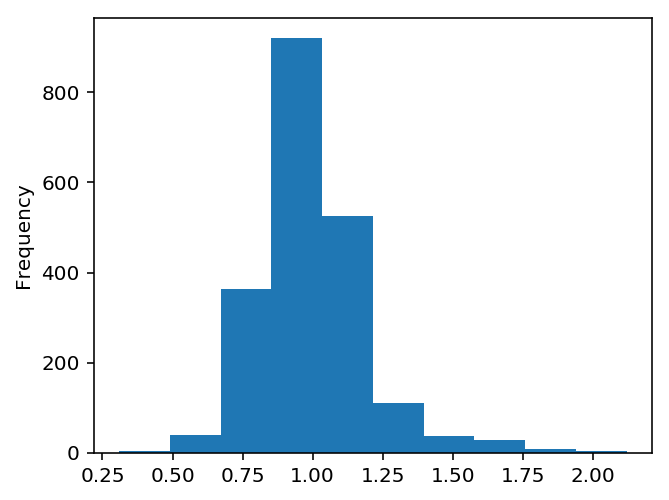

In [41]:
df2['T4U'].plot(kind = 'hist')

We can see that values are distributed close to gaussian distribution. Let's check also distributions by each of *class_status*:

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

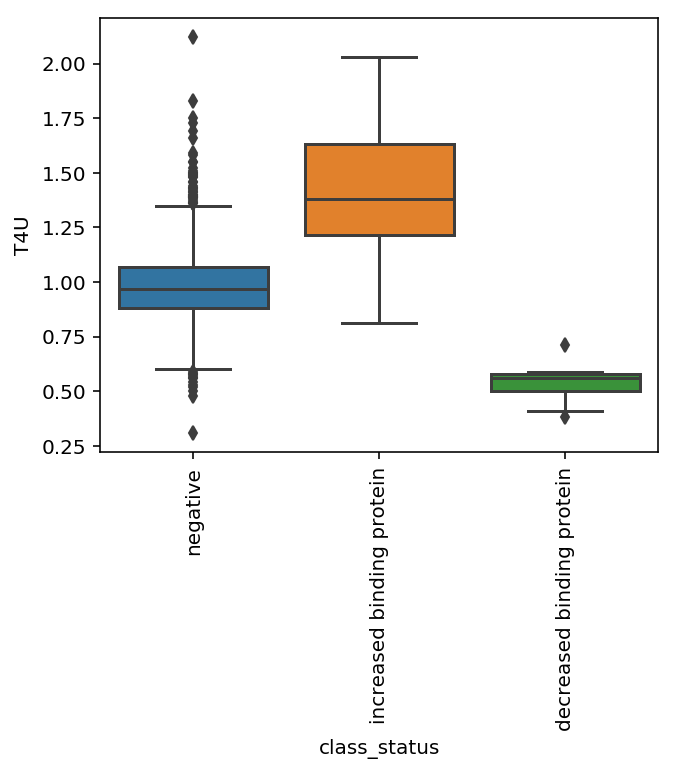

In [42]:
sns.boxplot('class_status','T4U', data=df2)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


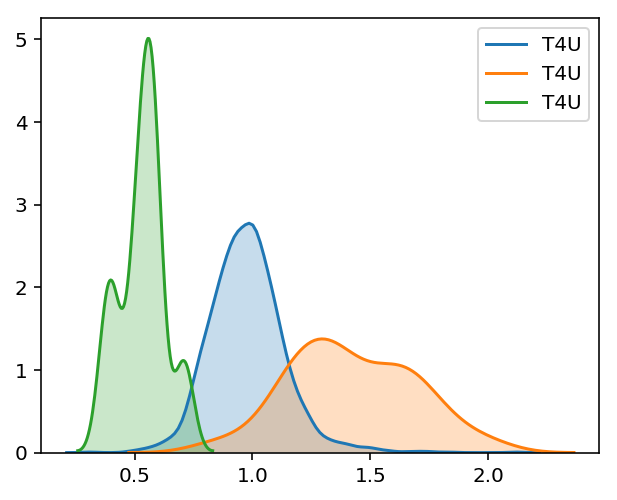

In [43]:
grouped_kdeplot(df2, 'T4U', 'class_status')

Each color stands for one *class_status* category. This looks very hopeful for *class_status* classification.

#### FTI (free thyroxin index)

General info about data types in dataset (df2) says that FTI is non-null object, which would make us assume it probably contains string. However, FTI contains numerical values.

First, let's transform FTI column values to numeric and replace missing values (?) to -1

In [44]:
df2[df2['FTI'].isnull()].FTI

72      NaN
373     NaN
738     NaN
919     NaN
1400    NaN
1544    NaN
1900    NaN
1946    NaN
1984    NaN
Name: FTI, dtype: object

In [45]:
df2.loc[df2['FTI'].isnull(), 'FTI'] = -1
df2['FTI'] = df2['FTI'].apply(lambda x: pd.to_numeric(x) if str(x) != '?' else -1)

([<matplotlib.patches.Wedge at 0x7faab5777e80>,
 [Text(-1.03779,0.364682,'filled in values'),
  Text(1.03779,-0.364682,'missing values')],
 [Text(-0.566067,0.198917,'89.24%'), Text(0.566067,-0.198917,'10.76%')])

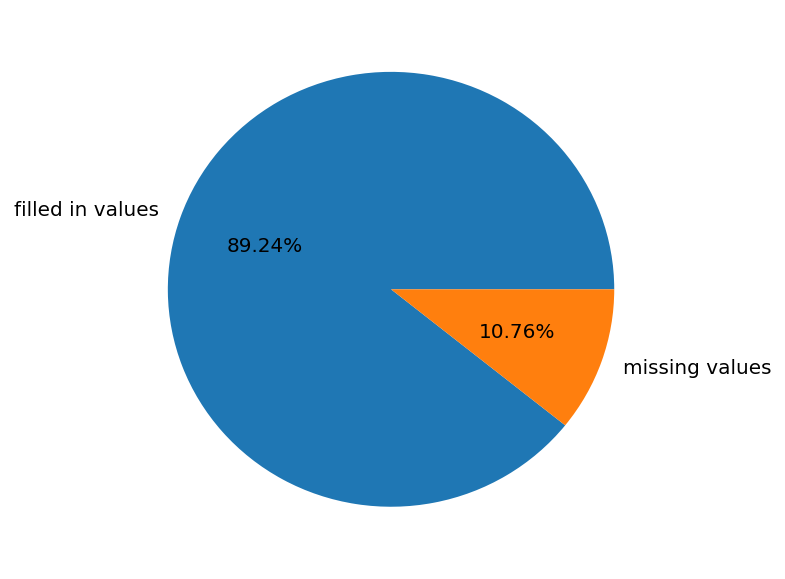

In [46]:
values = [len(df2[df2['FTI'] != -1]), len(df2[df2['FTI'] == -1])]
labels = ['filled in values', 'missing values']
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(x = values,labels = labels, autopct='%1.2f%%')

Basic look at the column statistics (excluding missing values)

In [47]:
FTI_filled_in = df2[df2['FTI'] != -1]
FTI_filled_in['FTI'].describe()

count    2041.000000
mean      111.286575
std        33.197786
min         2.000000
25%        93.000000
50%       107.000000
75%       125.000000
max       395.000000
Name: FTI, dtype: float64

In [48]:
FTI_filled_in[FTI_filled_in['FTI'].isnull()].FTI

Series([], Name: FTI, dtype: float64)

Look at the column values through histogram

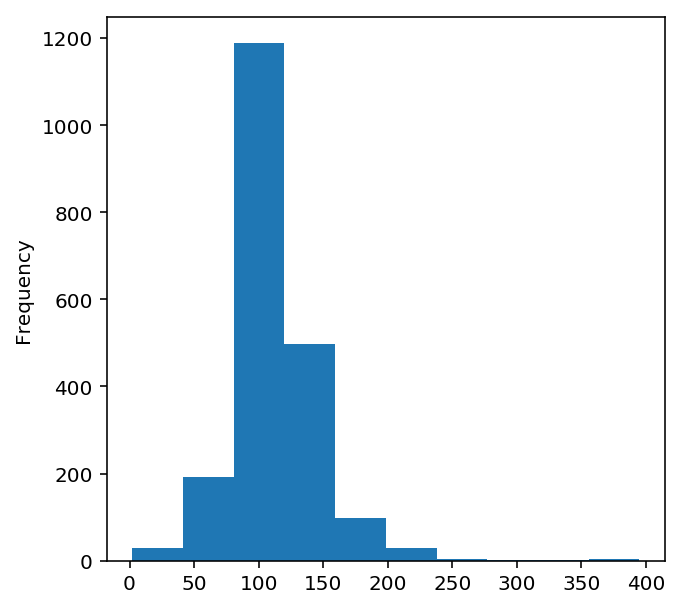

In [49]:
FTI_filled_in['FTI'].plot(kind = 'hist')

Look at the column values through boxplot

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

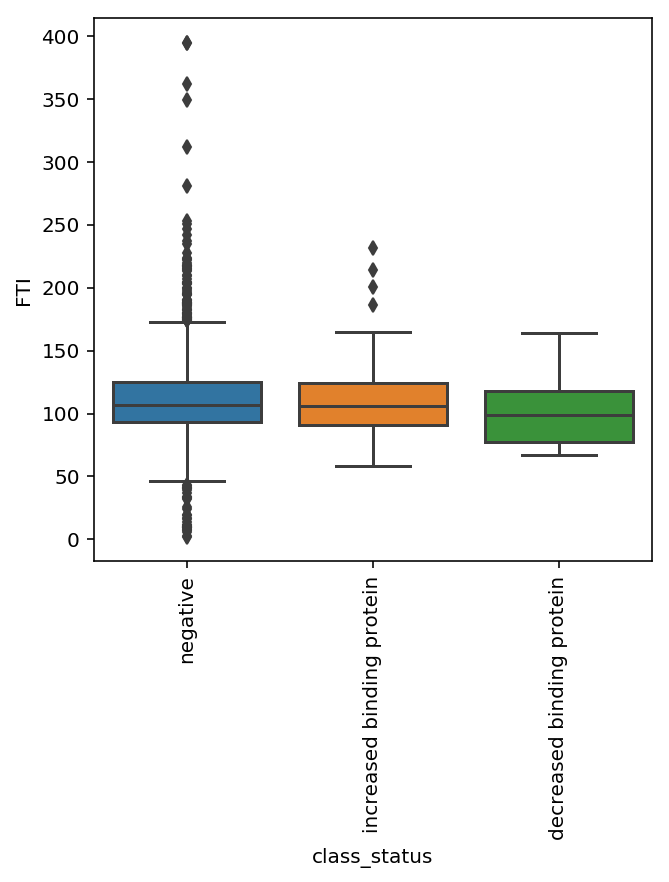

In [50]:
sns.boxplot('class_status','FTI', data=FTI_filled_in)
plt.xticks(rotation=90)

There is no noticable difference between group of FTI values grouped by class_status column values. Let's check also kdeplot, that should show something more:

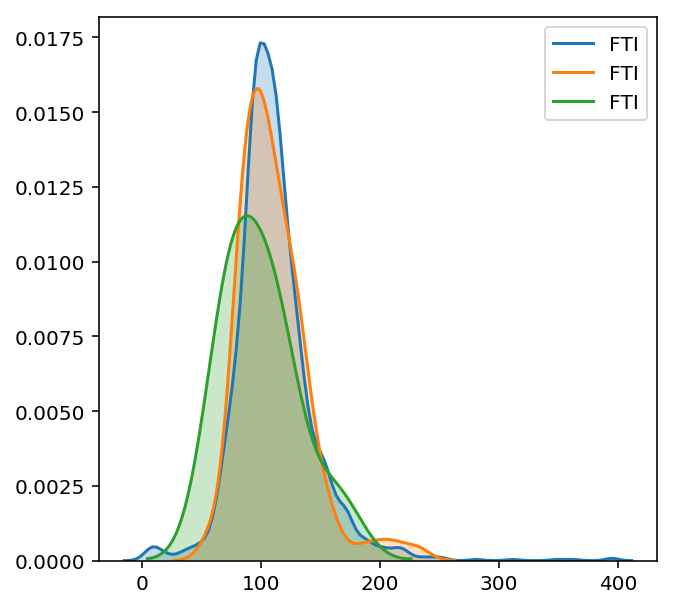

In [51]:
grouped_kdeplot(FTI_filled_in, 'FTI', 'class_status')

#### TT4

From analysis above, numerical values of measurements are quite interesting. Let's check TT4 measured values:

In [52]:
df2['TT4'].describe()

count    2125.000000
mean      109.540424
std        35.917648
min         2.000000
25%        88.000000
50%       104.000000
75%       125.000000
max       430.000000
Name: TT4, dtype: float64

Also distribution of values would be interesting:

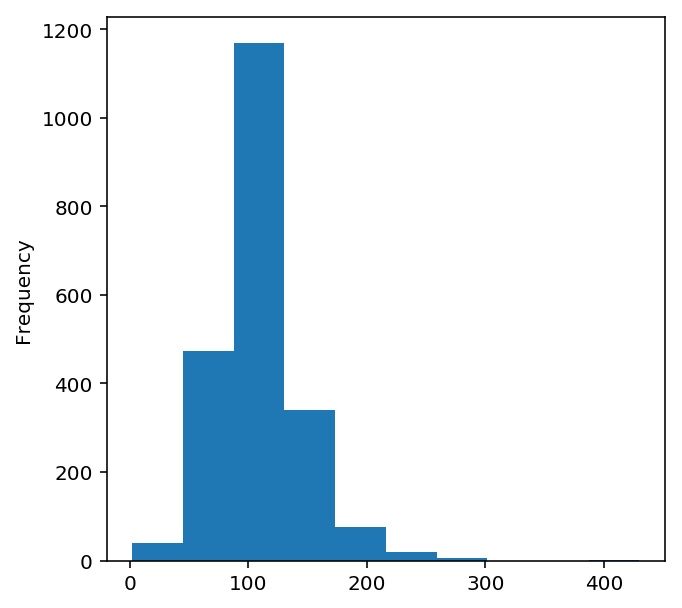

In [53]:
df2['TT4'].plot(kind = 'hist')

Distribution looks close to gaussian normal distribution. Check also distribution per class:

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

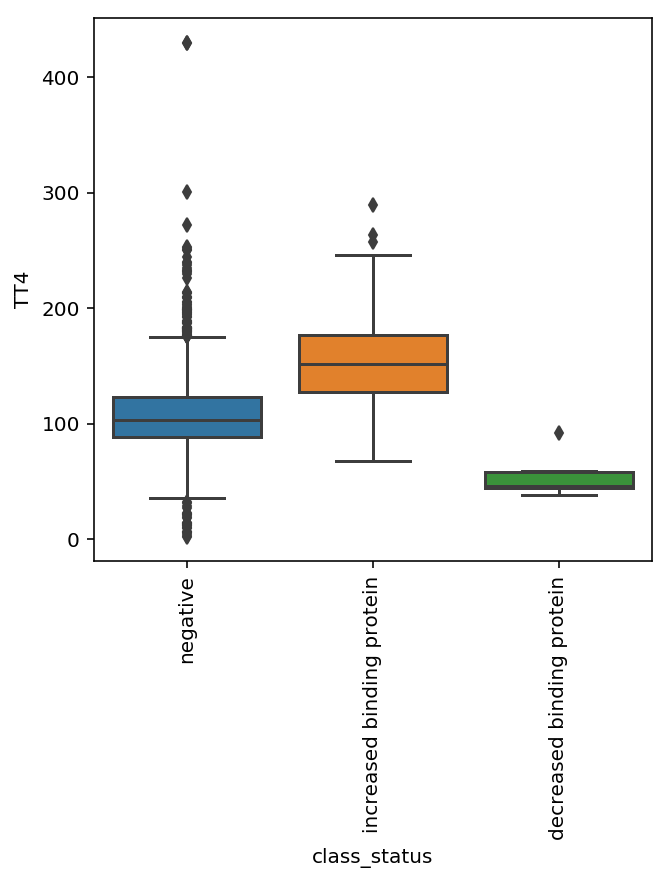

In [54]:
sns.boxplot('class_status','TT4', data=df2)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


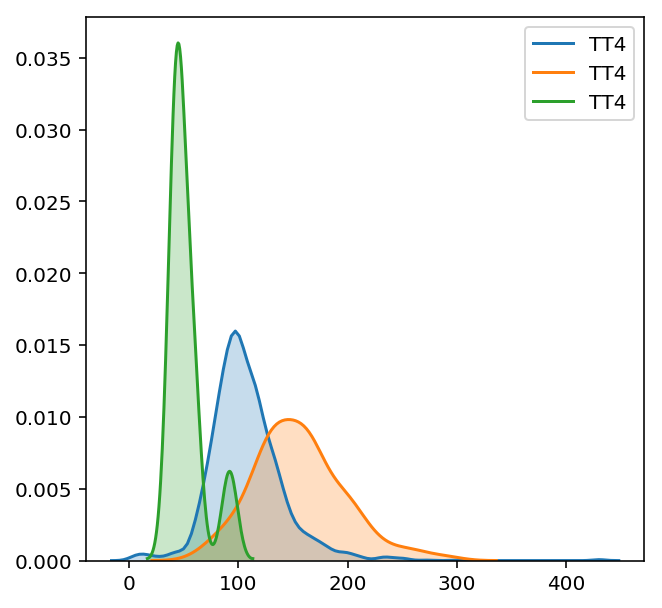

In [55]:
grouped_kdeplot(df2, 'TT4', 'class_status')

Again, attribute of measurements (TT4 in this case) would probably help in classifying.

##### Hypothesis: *Thyroxine (T4) hormone has an impact on increased binding protein.*

Our hypothesis is that there is significant difference in T4 values for class representing *increased binding protein* or not.

We also need to specify H_0 hypothesis, that would be: *Thyroxine (T4) hormone has no impact on increased binding protein - there are no significant differences in T4 values for patients with hyperthyroid or healthy patients.*

At first, we have to choose TT4 values and group them by class *increased binding protein*:

In [56]:
TT4 = df2[(df2.class_status.str.contains('increased')) | (df2.class_status.str.contains('negative'))]

Let's check differences between our groups in boxplot:

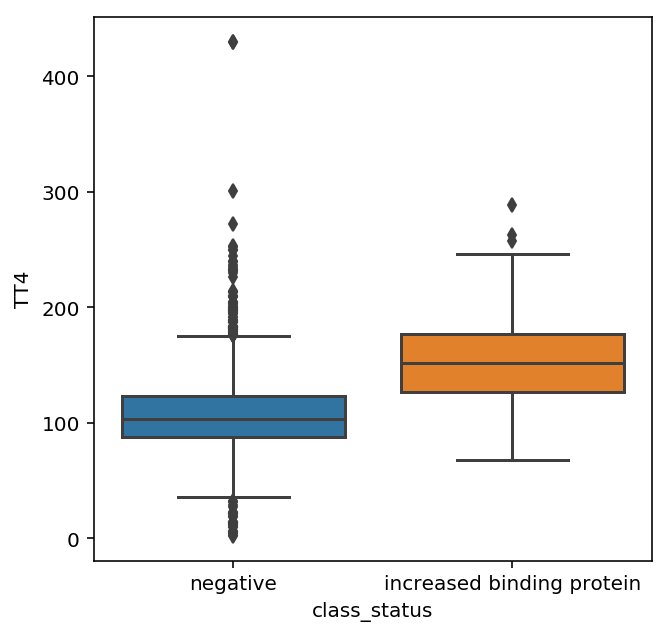

In [57]:
sns.boxplot('class_status','TT4', data=TT4)

We can see there is a difference. But is it significant? We need to go more deeper and check significance level using statisical tests.

For using t-test, both groups should have values close to normal distribution. Let's check that:

In [58]:
TT4_hyperthyroid = TT4[TT4['class_status'].str.contains('increased')].TT4.dropna()
TT4_negative = TT4[TT4['class_status'].str.contains('negative')].TT4.dropna()

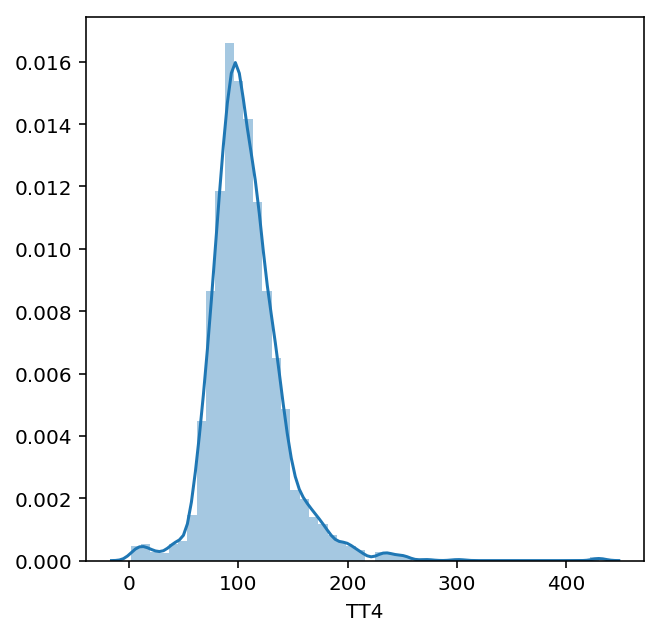

In [59]:
sns.distplot(TT4_negative)

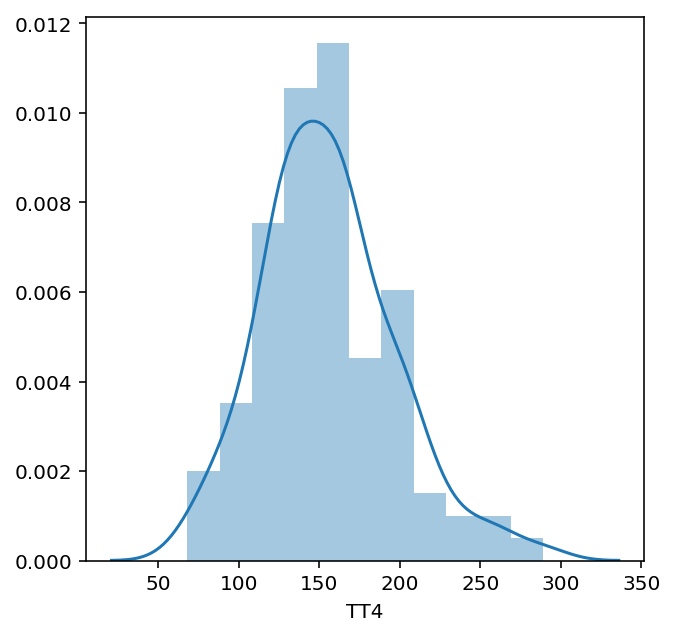

In [60]:
sns.distplot(TT4_hyperthyroid)

Just from distplots above, we can't confidently distinct and decide whether the values are from normal distribution or not. ProbPlot would help.

Distribution of TT4 values for *negative* class:

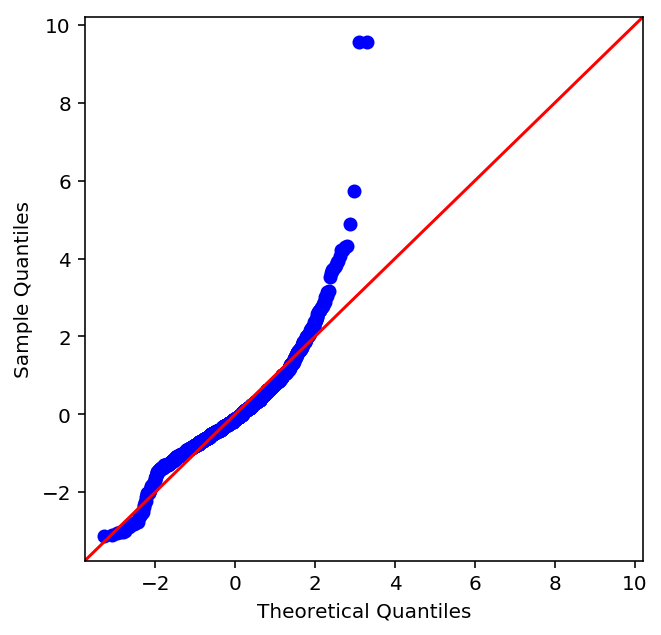

In [61]:
_ = sm.ProbPlot(TT4_negative, fit=True).qqplot(line='45')

Distribution of TT4 values for *increased binding protein* class:

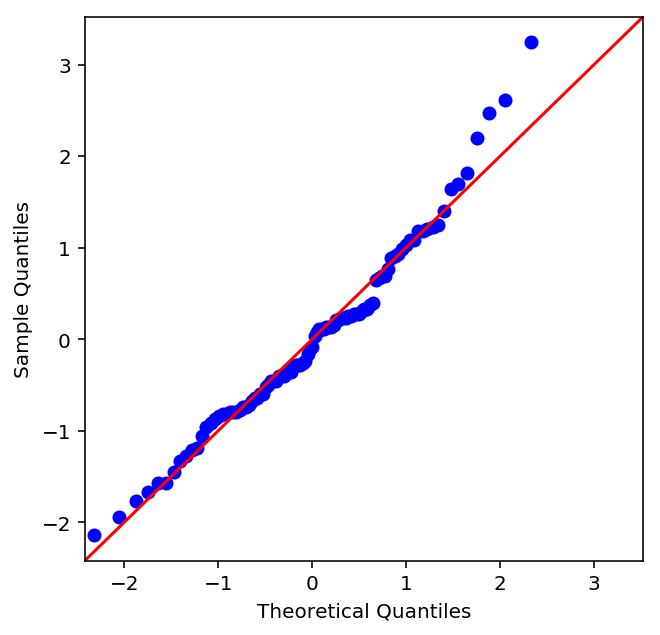

In [62]:
_ = sm.ProbPlot(TT4_hyperthyroid, fit=True).qqplot(line='45')

From plots, we can say that TT4 values for class with *increased binding protein* are probably close to normal distribution. But statistical tests would tell us the result:

In [63]:
print('Shapiro TT4_negative: ' + str(stats.shapiro(TT4_negative)) + '\nShapiro TT4_hyperthyroid: ' + str(stats.shapiro(TT4_hyperthyroid)))

Shapiro TT4_negative: (0.9052683711051941, 1.278476472161951e-33)
Shapiro TT4_hyperthyroid: (0.9757018685340881, 0.06362581998109818)


Shapiro-Wilk tests shows that TT4 values for increased binding protein (TT4_hyperthyroid) are from normal distribution. However, other values (TT4_negative) aren't. It can be caused either by too many values or outliers. Let's try Anderson-Darling test:

In [64]:
anderson(TT4_negative)

AndersonResult(statistic=31.18668953171573, critical_values=array([0.575, 0.655, 0.785, 0.916, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Even Anderson-Darling test showed the same result. Because of that, we can't use **t-test** to confirm our hypothesis. **Mann-Whitney U test** should be used instead:

In [65]:
mannwhitneyu(TT4_negative, TT4_hyperthyroid)

MannwhitneyuResult(statistic=31961.5, pvalue=1.5976037392035403e-30)

Mann-Whitney U test showed, that p-value is very small (< 0.001), so our **H_0 hypothesis is rejected**, that means our hypothesis is proven! Attribute with TT4 hormone should be used to classify class. Let's visualize that with confidence intervals:

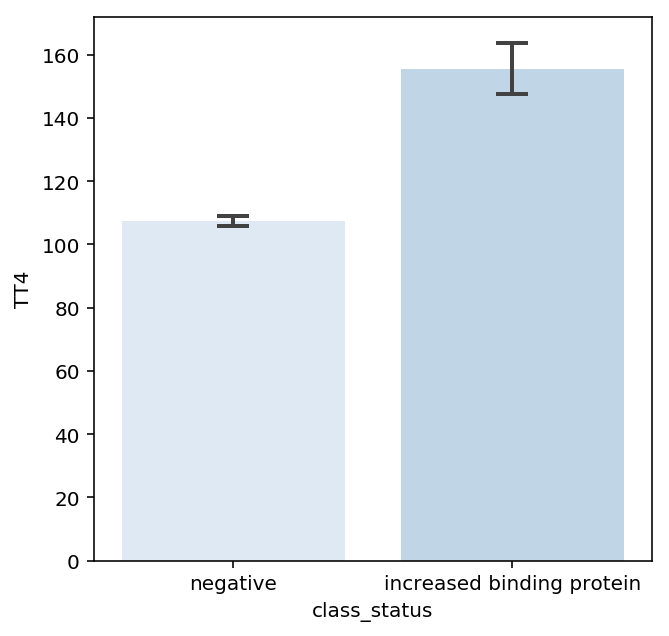

In [66]:
sns.barplot(x='class_status', y='TT4', data=df2[(df2.class_status.str.contains('increased')) | (df2.class_status.str.contains('negative'))], 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

#### capital-loss

We are not sure what this attribute stands for, so we'll just continue with basic analysis:

In [67]:
df2['capital-loss'].describe()

count    2281.000000
mean       70.472600
std       363.415412
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3683.000000
Name: capital-loss, dtype: float64

Histogram displaying values frequency of capital-loss attribute:

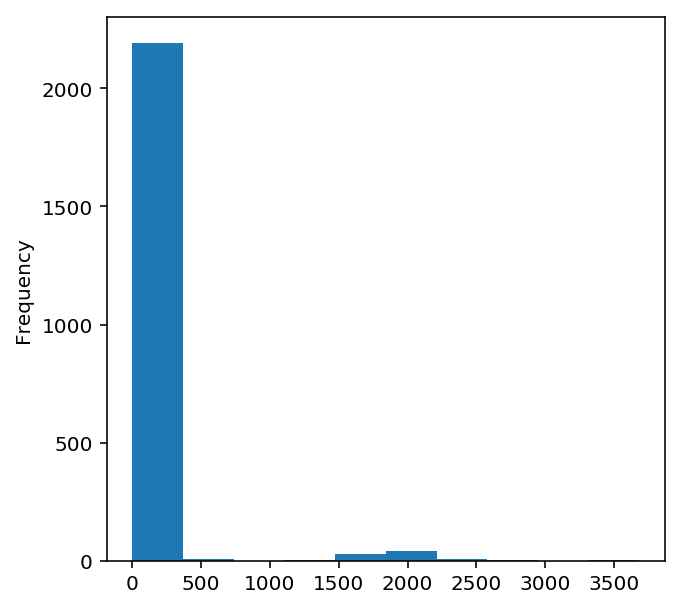

In [68]:
df2['capital-loss'].plot(kind = 'hist')

Boxplot displaying values distribution of capital-loss attribute per classes:

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

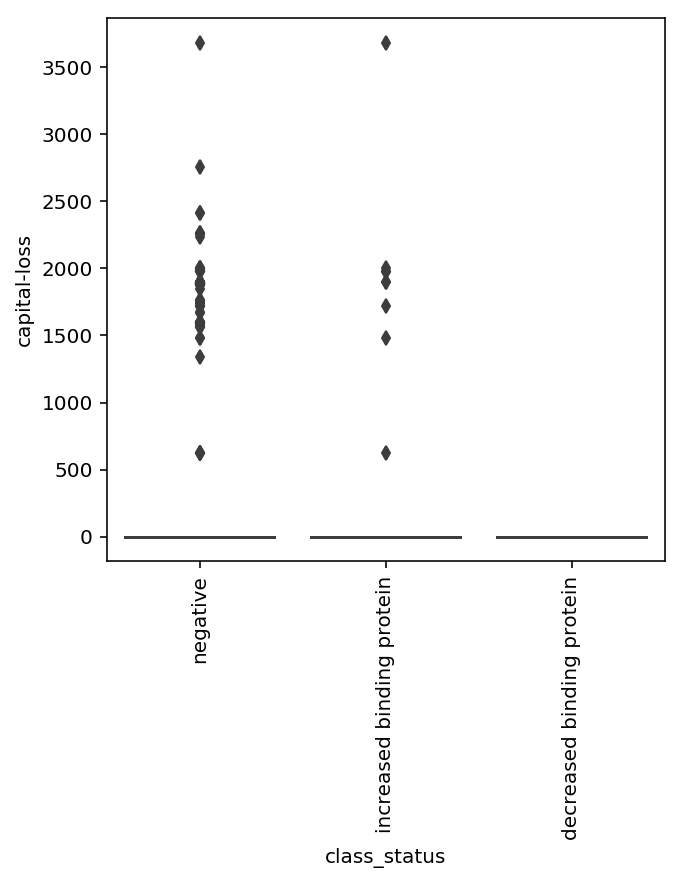

In [69]:
sns.boxplot('class_status','capital-loss', data=df2)
plt.xticks(rotation=90)

Kdeplot displaying values distribution of capital-loss attribute per classes:

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


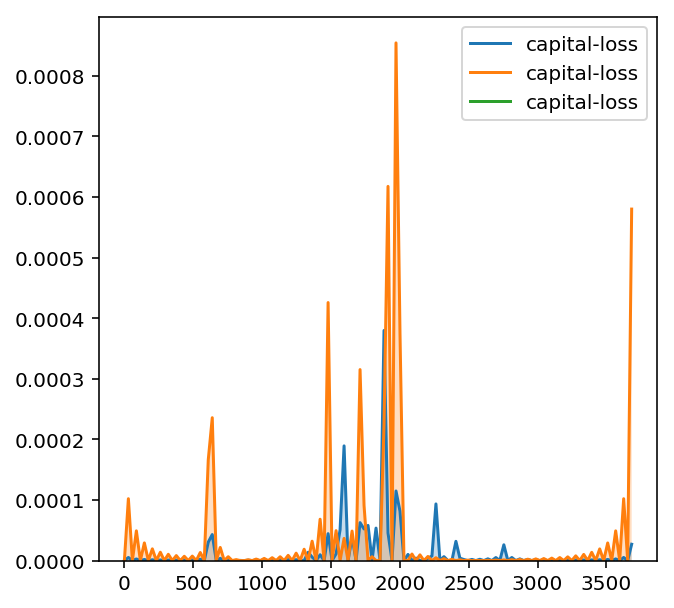

In [70]:
grouped_kdeplot(df2, 'capital-loss', 'class_status')

*capital-loss* attribute looks like it is not going to help us in classification.

#### capital-gain

As in *capital-loss*, also we are not sure about *capital-gain*. Maybe analysis would say something more:

In [71]:
df2['capital-gain'].describe()

count     2276.000000
mean      1084.970562
std       7874.282515
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

Histogram displaying values frequency of capital-gain attribute:

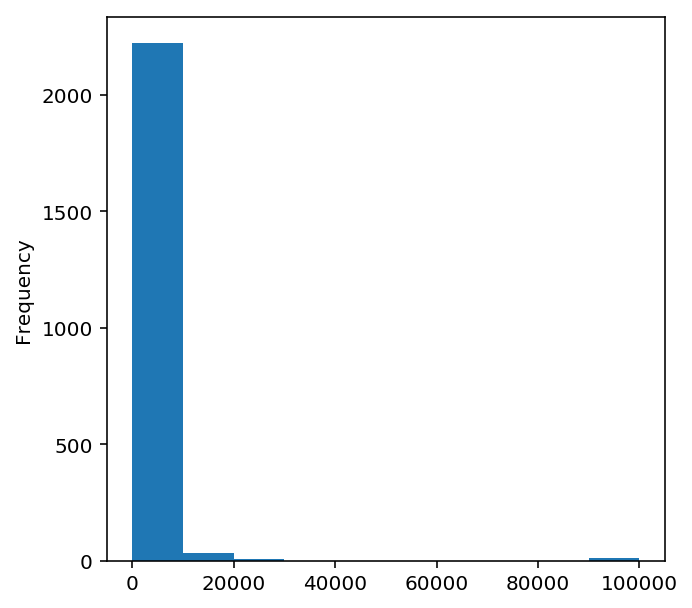

In [72]:
df2['capital-gain'].plot(kind = 'hist')

Boxplot displaying values distribution of capital-gain attribute per classes:

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

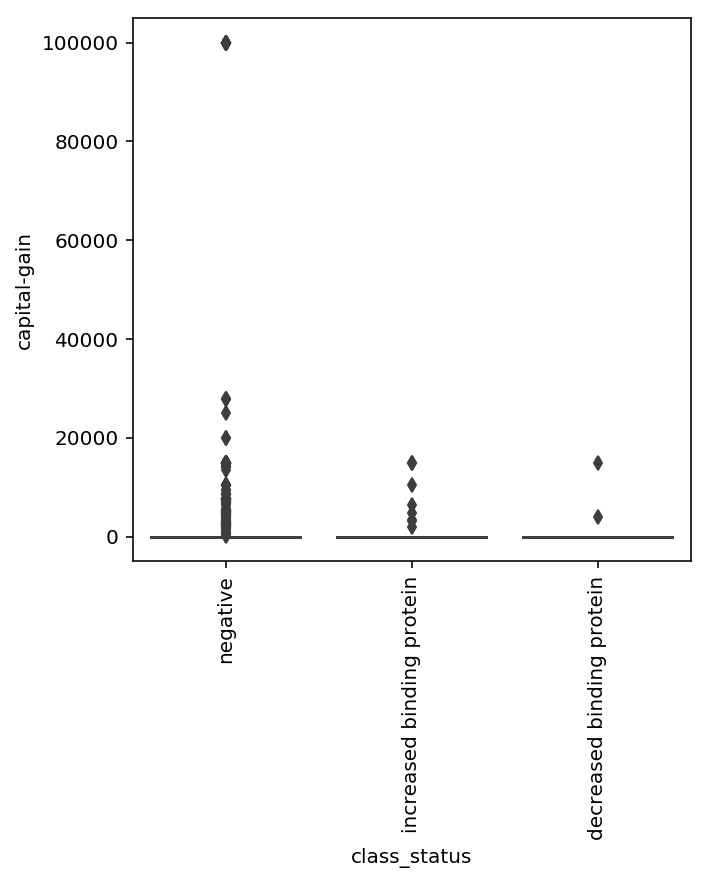

In [73]:
sns.boxplot('class_status','capital-gain', data=df2)
plt.xticks(rotation=90)

We can see, there are some outliers in our data.

Kdeplot displaying values distribution of capital-gain attribute per classes:

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


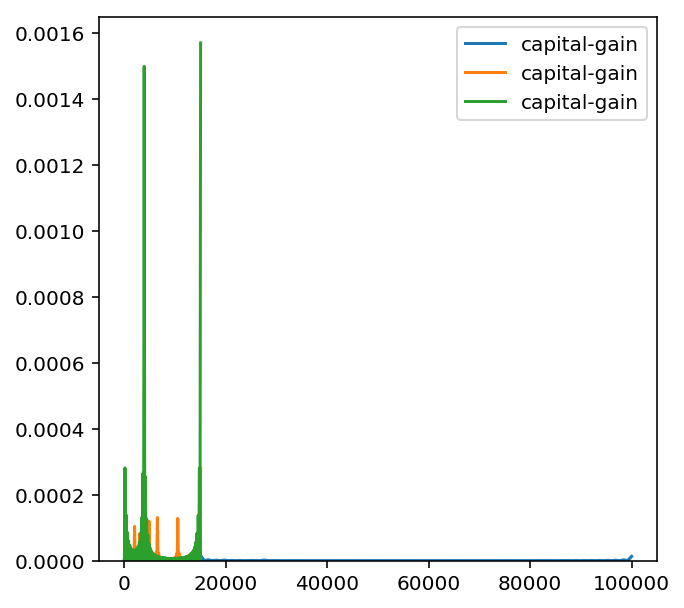

In [74]:
grouped_kdeplot(df2, 'capital-gain', 'class_status')

As capital-loss, also *capital-gain* is not showing something interesting. There are just some outliers, so probably if we want to use them, we should do some preprocessing before.

#### on thyroxine 
Looking at unique values in this column:

In [75]:
df2['on thyroxine'].unique()

array(['t', 'f', nan], dtype=object)

Unifying boolean values in this column:

In [76]:
# again, fix problem with boolean unifying
df2['on thyroxine'] = df2['on thyroxine'].apply(lambda x: unify_boolean(str(x)))

Table of unique values (of this column) distribution through classes:

In [77]:
pd.crosstab(df2['on thyroxine'], df2.class_status)

class_status 
 decreased binding protein 
 increased binding protein 
 negative 
 
 
 on thyroxine 
 
 
 
 
 
 
 
 f 
 9 
 95 
 1905 
 
 
 t 
 0 
 6 
 261

Pie chart displaying percentual distribution of unique values of this column:

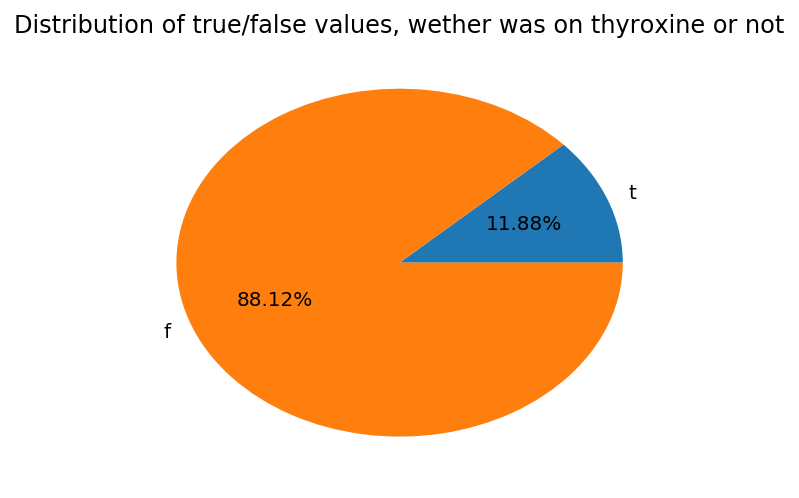

In [78]:
pie_plot(df2, 'on thyroxine', title='Distribution of true/false values, wether was on thyroxine or not')

Barplot displaying unique values (of this column) distribution through classes:

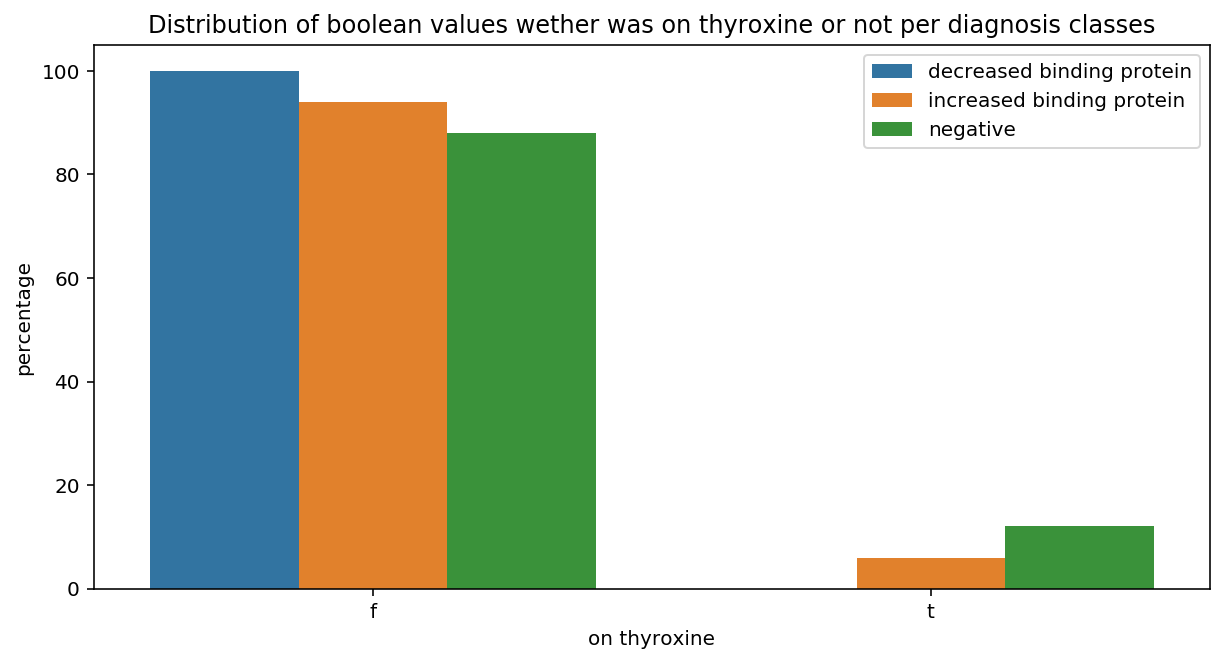

In [79]:
grouped_barplot(df2, 'on thyroxine', 'class_status', title='Distribution of boolean values wether was on thyroxine or not per diagnosis classes', size=(10,5))

There are some differences between *class_status* categories, but not significant enough.

#### TSH measured
Looking at unique values in this column:

In [80]:
df2['TSH measured'].unique()

array(['t', 'f', nan], dtype=object)

Unifying boolean values in this column:

In [81]:
# again, fix problem with boolean unifying
df2['TSH measured'] = df2['TSH measured'].apply(lambda x: unify_boolean(str(x)))

Table of unique values (of this column) distribution through classes:

In [82]:
pd.crosstab(df2['TSH measured'], df2.class_status)

class_status 
 decreased binding protein 
 increased binding protein 
 negative 
 
 
 TSH measured 
 
 
 
 
 
 
 
 f 
 0 
 7 
 231 
 
 
 t 
 9 
 92 
 1935

Pie chart displaying percentual distribution of unique values of this column:

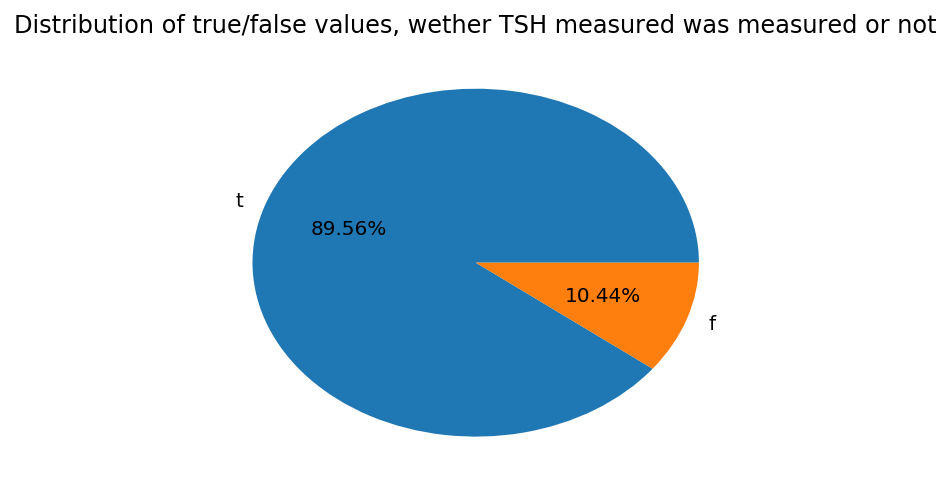

In [83]:
pie_plot(df2, 'TSH measured', title='Distribution of true/false values, wether TSH measured was measured or not')

Barplot displaying unique values (of this column) distribution through classes:

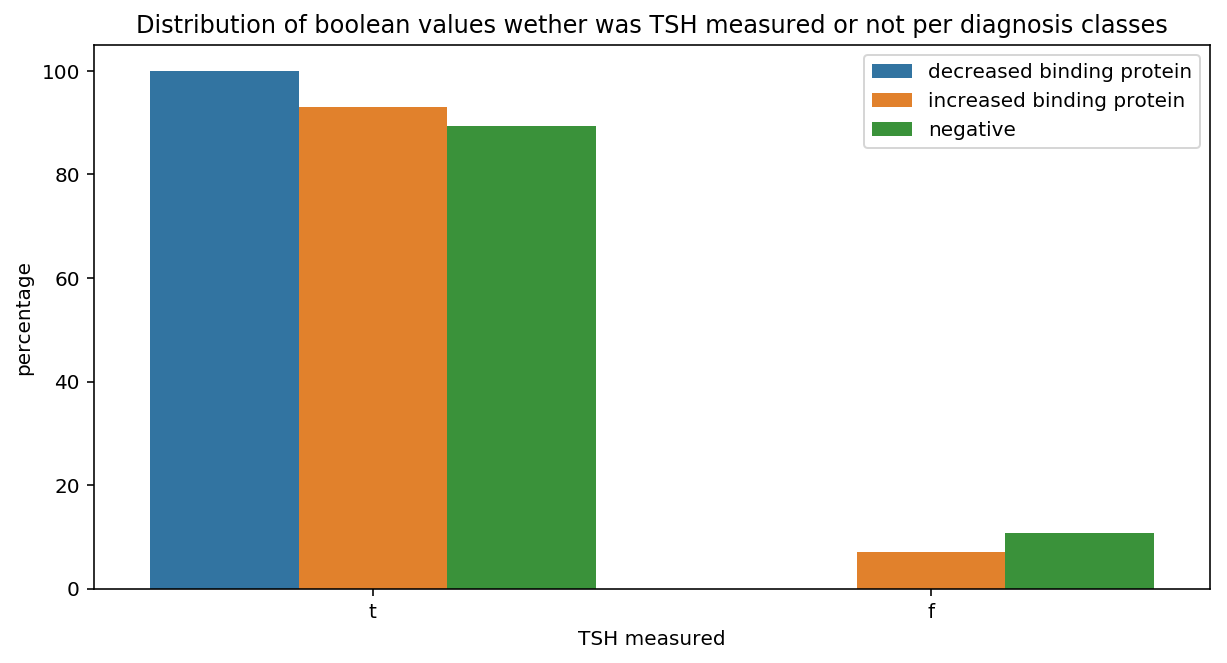

In [84]:
grouped_barplot(df2,'TSH measured','class_status',title='Distribution of boolean values wether was TSH measured or not per diagnosis classes', size= (10,5), rotation=0)

#### TSH
Basic description of numerical values in TSH column:

In [85]:
df2['TSH'].describe()

count    2042.000000
mean        4.443928
std        20.149000
min         0.005000
25%         0.432500
50%         1.400000
75%         2.600000
max       478.000000
Name: TSH, dtype: float64

Histogram displaying values frequency of TSH attribute:

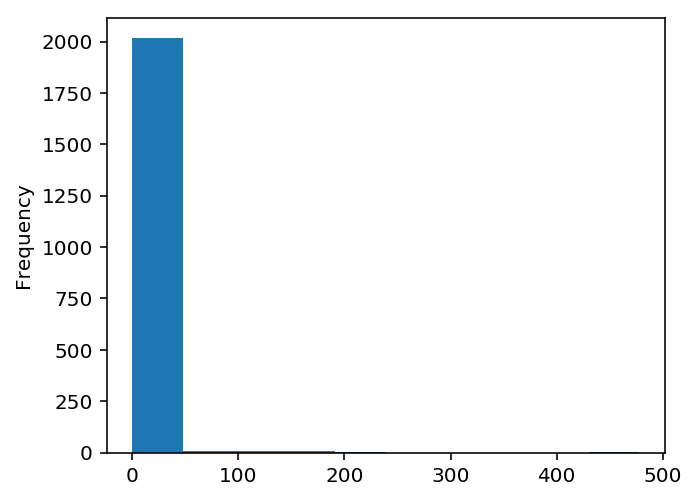

In [86]:
df2['TSH'].plot(kind = 'hist')

Boxplot displaying values distribution of TSH attribute per classes:

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

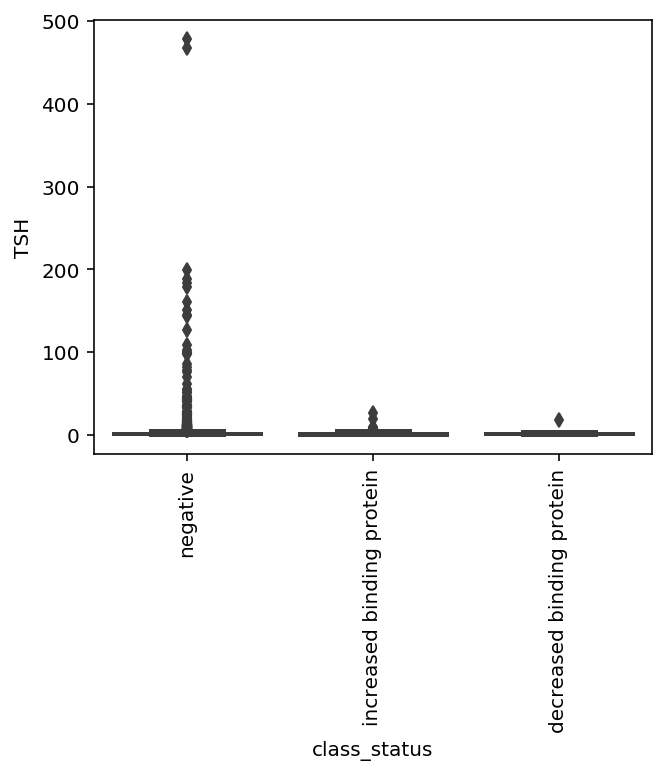

In [87]:
sns.boxplot('class_status','TSH', data=df2)
plt.xticks(rotation=90)

Majority of the data are in lower values, so let's check boxplot for lower values of TSH attribute:

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

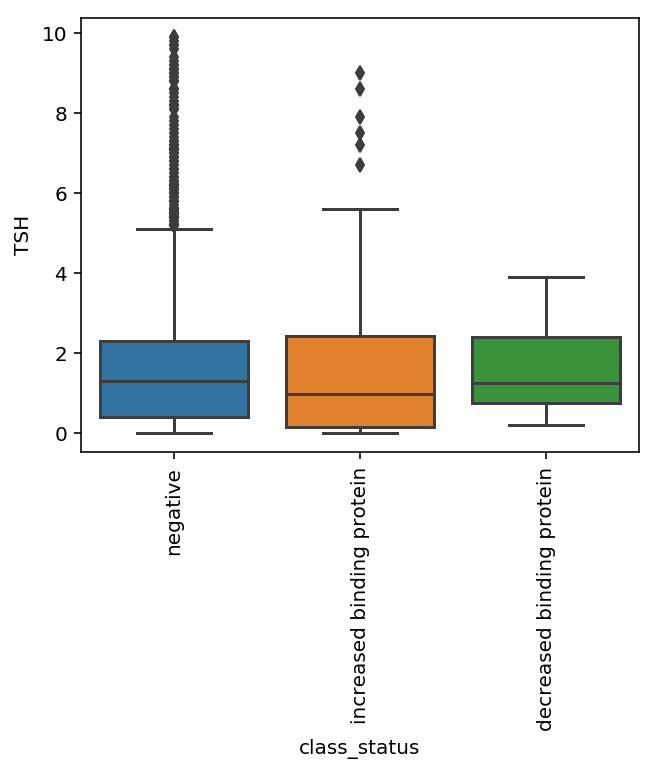

In [88]:
sns.boxplot('class_status','TSH', data=df2[df2.TSH < 10])
plt.xticks(rotation=90)

From boxplot above we can see, that negative class has tendency to contain outliers.

Kdeplot displaying values distribution of TSH attribute per classes:

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


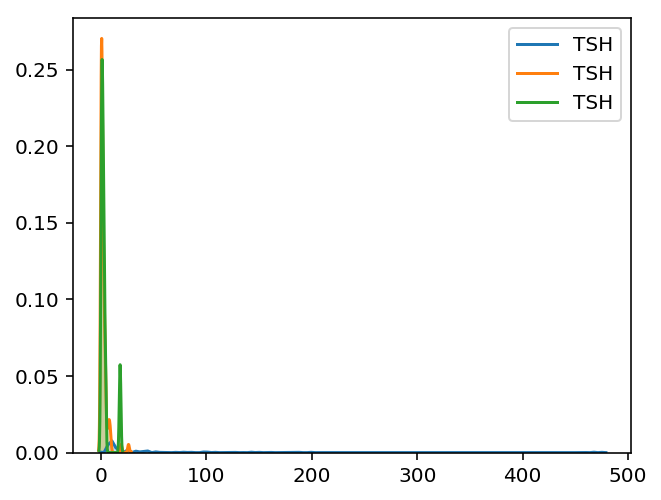

In [89]:
grouped_kdeplot(df2, 'TSH', 'class_status')

TSH attribute has a lot of small values, but also some outliers. To better see the difference between classes, removing outliers would help:

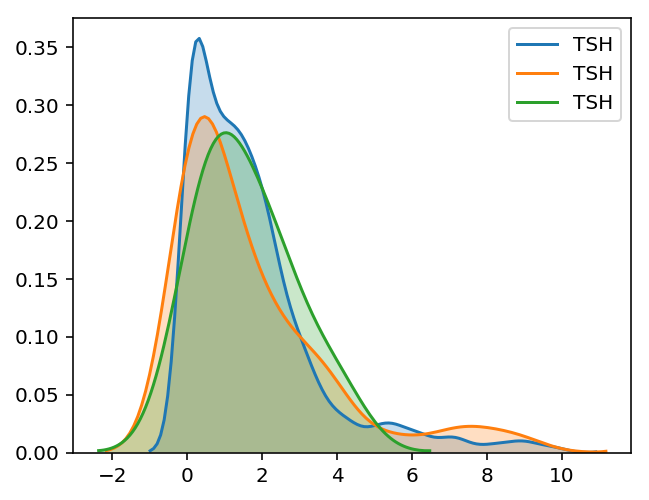

In [90]:
grouped_kdeplot(df2[df2.TSH < 10], 'TSH', 'class_status')

#### T3

Basic description of numerical values in T3 column:

In [91]:
df2['T3'].describe()

count    1798.000000
mean        2.025362
std         0.814114
min         0.050000
25%         1.600000
50%         2.000000
75%         2.400000
max        10.600000
Name: T3, dtype: float64

Histogram displaying values frequency of T3 attribute:

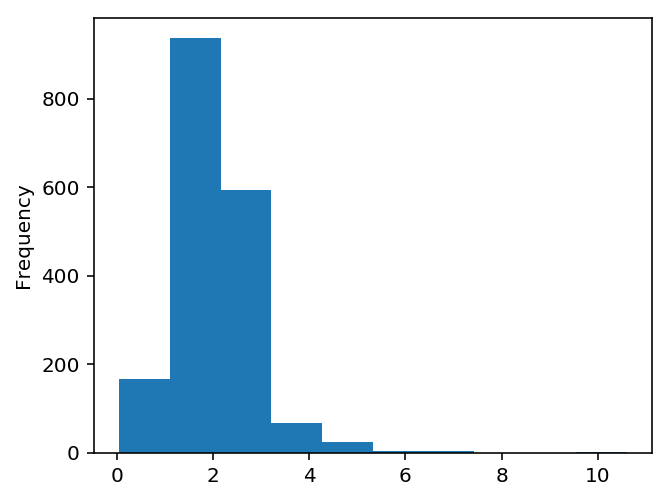

In [92]:
df2['T3'].plot(kind = 'hist')

Boxplot displaying values distribution of T3 attribute per classes:

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

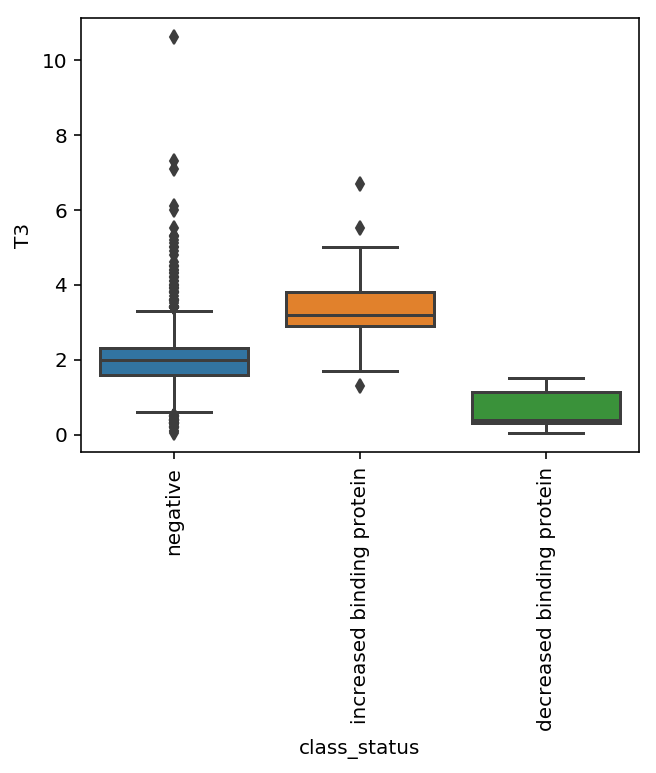

In [93]:
sns.boxplot('class_status','T3', data=df2)
plt.xticks(rotation=90)

Kdeplot displaying values distribution of T3 attribute per classes:

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


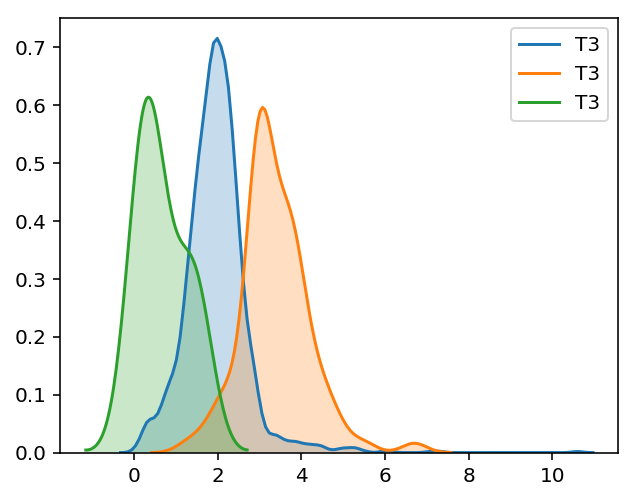

In [94]:
grouped_kdeplot(df2, 'T3', 'class_status')

Again, those measurements look very good for predicting *class_status* attribute.

##### Hypothesis: *Patients with hyperthyroidism will have an elevated T3 level.*

In other words, there is significant difference between T3 values for class representing *hyperthyroidism* or *negative* class, that indicates healthy patients.

This hypothesis formulation is based on graphs above. We need to set also H_0 hypothesis, that would be: *Patients with hyperthyroidism will have approximately the same T3 level as patients without.*

At first, we need to preprocess data a little bit. Let's divide our data to two groups - patient has hyperthyroidism or healthy patients:

In [95]:
T3 = df2[(df2.class_status.str.contains('increased')) | (df2.class_status.str.contains('negative'))]

Now, we should check T3 distribution for both groups:

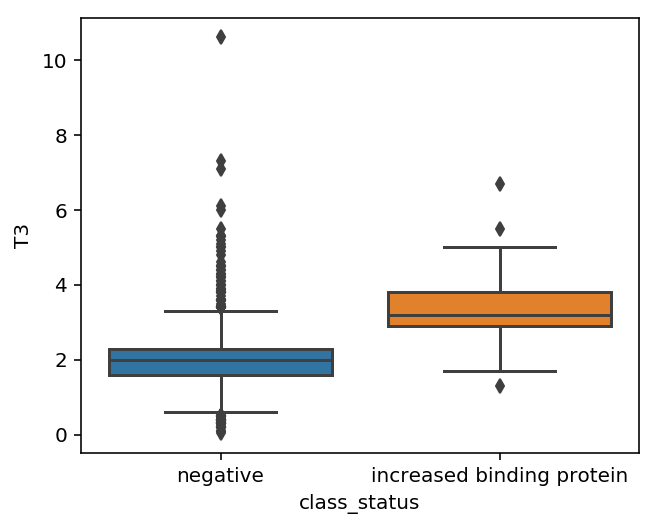

In [96]:
sns.boxplot('class_status','T3', data=T3)

That's look hopeful to be truth! Now, we need to test our hypothesis statistically. At first, we need to check distribution of T3 for each group, to verify the conditions of t-test use:

In [97]:
T3_hyperthyroid = T3[T3['class_status'].str.contains('increased')].T3.dropna()
T3_negative = T3[T3['class_status'].str.contains('negative')].T3.dropna()

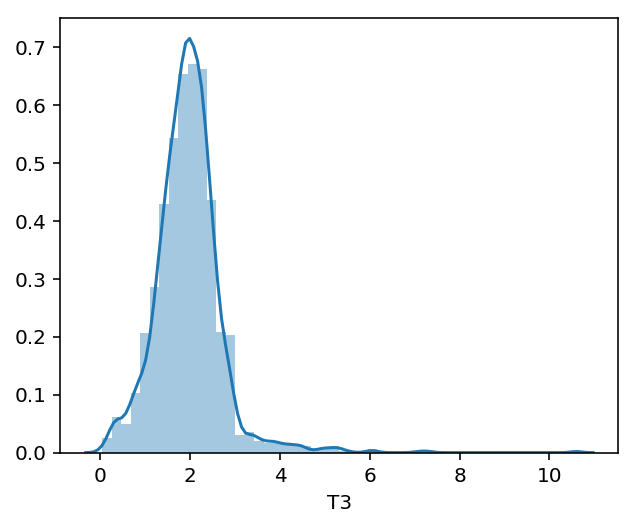

In [98]:
sns.distplot(T3_negative)

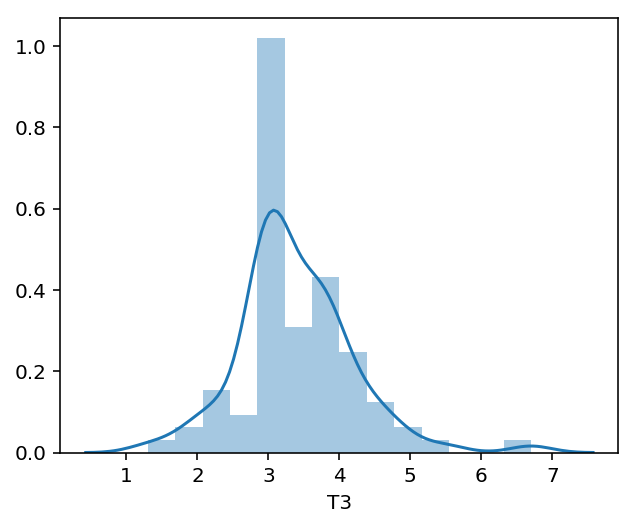

In [99]:
sns.distplot(T3_hyperthyroid)

We are not able to say if values are from normal distribution. We should use ProbPlot to check that. If values are distributed on line, values are close to normal distribution.

ProbPlot to check distribution of T3 values for *negative* class:

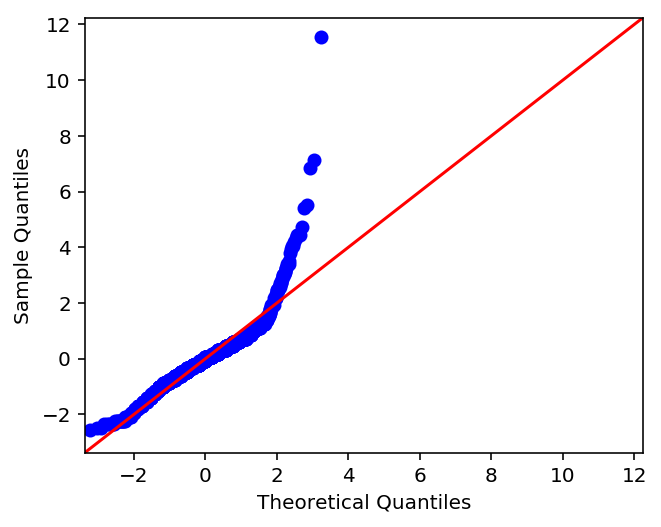

In [100]:
_ = sm.ProbPlot(T3_negative, fit=True).qqplot(line='45')

ProbPlot to check distribution of T3 values for *increased binding protein* class:

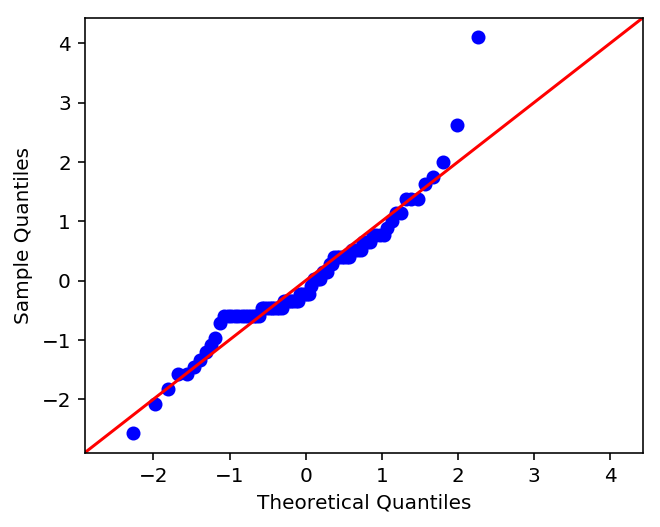

In [101]:
_ = sm.ProbPlot(T3_hyperthyroid, fit=True).qqplot(line='45')

From plots above, we can see data are not from normal distribution. We can check this up by statistical Shapiro-Wilk tests:

In [102]:
print('Shapiro T3_negative: ' + str(stats.shapiro(T3_negative)) + '\nShapiro T3_hyperthyroid: ' + str(stats.shapiro(T3_hyperthyroid)))

Shapiro T3_negative: (0.877945065498352, 1.399872919137112e-34)
Shapiro T3_hyperthyroid: (0.9430174231529236, 0.001018896116875112)


Because T3 values are not close to normal distribution, we need to use Mann-Whitney U test to prove our hypothesis:

In [103]:
mannwhitneyu(T3_negative, T3_hyperthyroid)

MannwhitneyuResult(statistic=10691.5, pvalue=4.8388535106368895e-40)

Mann-Whitney U test showed that pvalue is very small (< 0.05), that means we are rejecting our H_0 hypothesis. Our hypothesis, that patients with hyperthyroidism will have an elevated T3 level is proven! This is another interesting attribute for our classification. Let's check barplots with confidence intervals:

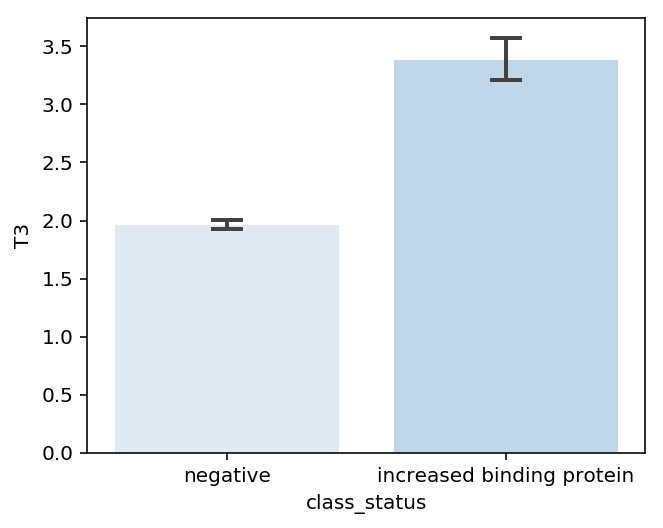

In [104]:
sns.barplot(x='class_status', y='T3', data=df2[(df2.class_status.str.contains('increased')) | (df2.class_status.str.contains('negative'))], 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

#### Additional hypothesis: *Patients with hypothyroidism will have depressed T3 level.*

In [105]:
T3_d = df2[(df2.class_status.str.contains('decreased')) | (df2.class_status.str.contains('negative'))]

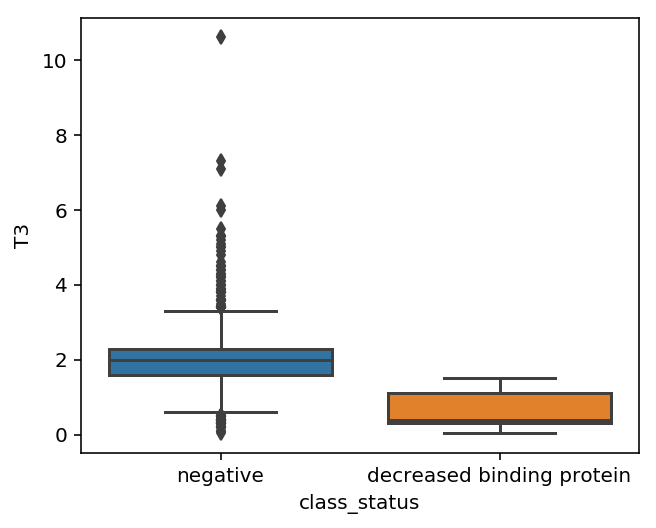

In [106]:
sns.boxplot('class_status','T3', data=T3_d)

From plot above, we can say there is significant difference, but let's prove that. Because we checked distribution of T3 values for *negative* class above, we are not able to use t-test. Let's use Mann-Whitney U test then:

In [107]:
T3_d_hyperthyroid = T3_d[T3_d['class_status'].str.contains('decreased')].T3.dropna()
T3_d_negative = T3_d[T3_d['class_status'].str.contains('negative')].T3.dropna()
mannwhitneyu(T3_d_negative, T3_d_hyperthyroid)

MannwhitneyuResult(statistic=950.0, pvalue=1.2760681880010157e-05)

Again, our hypothesis is proven! Because Mann-Whitney U test showed p-value to be less than 0.05. Using T3 as attribute for prediction of disease class would be definitely good idea.

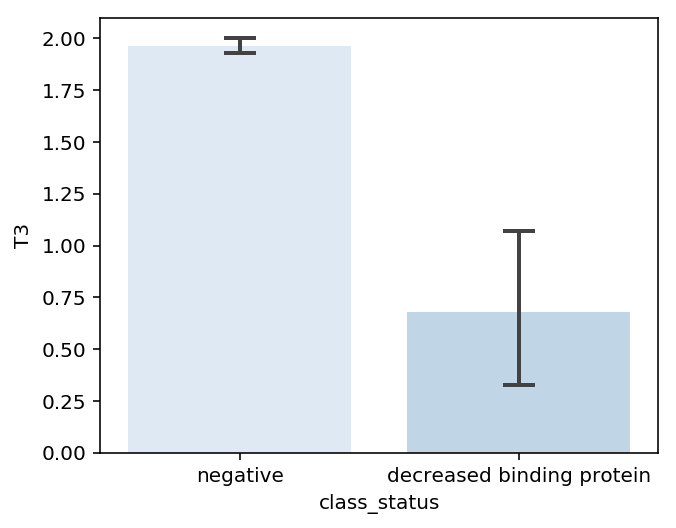

In [108]:
sns.barplot(x='class_status', y='T3', data=df2[(df2.class_status.str.contains('decreased')) | (df2.class_status.str.contains('negative'))], 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

#### fnlwgt

Basic description of numerical values in fnlwgt column:

In [109]:
df2['fnlwgt'].describe()

count    2.279000e+03
mean     1.873010e+05
std      1.043877e+05
min      1.228500e+04
25%      1.160275e+05
50%      1.778240e+05
75%      2.355835e+05
max      1.366120e+06
Name: fnlwgt, dtype: float64

Histogram displaying values frequency of fnlwgt attribute:

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000., 1600000.]),
 <a list of 10 Text xticklabel objects>)

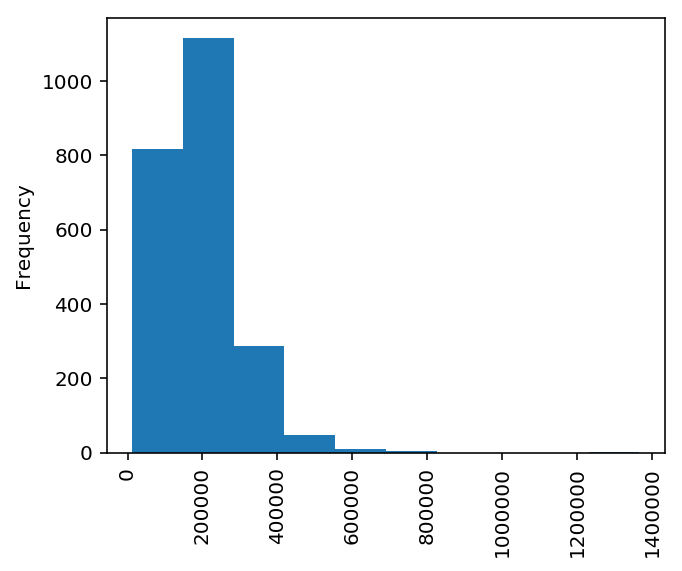

In [110]:
df2['fnlwgt'].plot(kind = 'hist')
plt.xticks(rotation=90)

Boxplot displaying values distribution of fnlwgt attribute per classes:

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

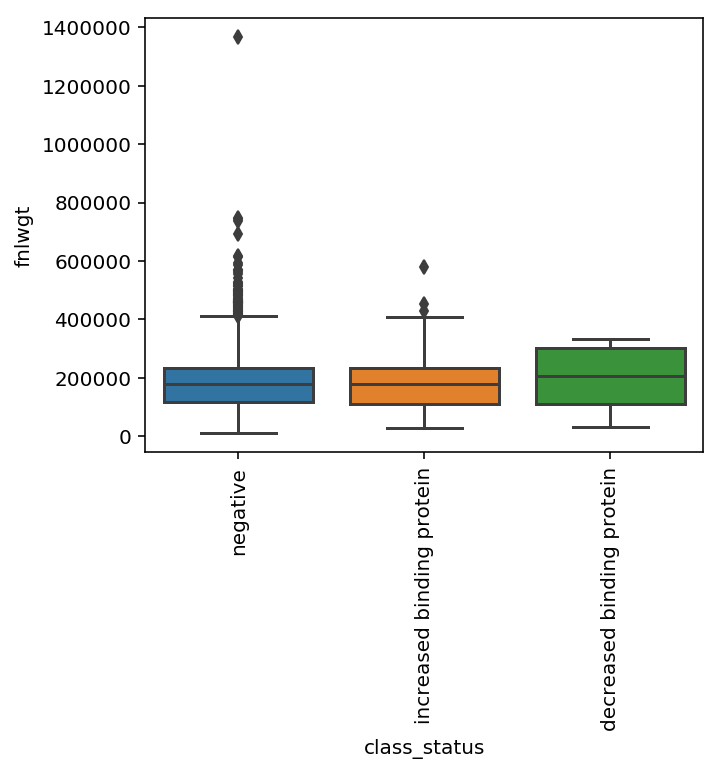

In [111]:
sns.boxplot('class_status','fnlwgt', data=df2)
plt.xticks(rotation=90)

Kdeplot displaying values distribution of fnlwgt attribute per classes:

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


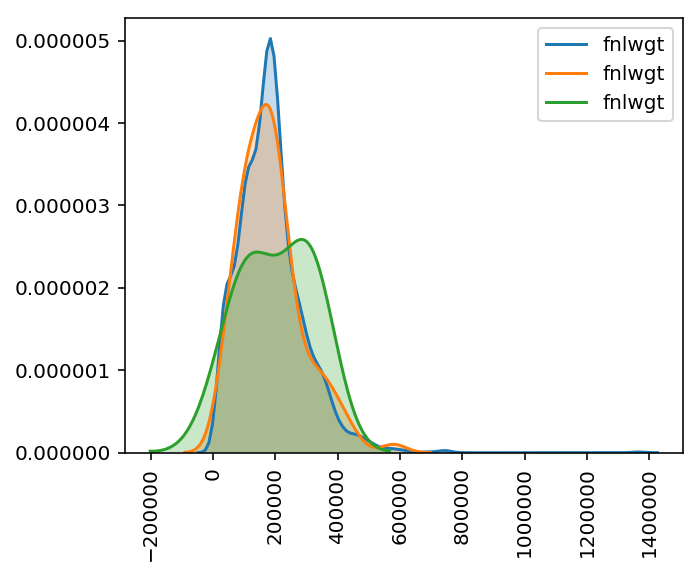

In [112]:
grouped_kdeplot(df2, 'fnlwgt', 'class_status', rotation=90)

This attribute is not showing something significant for classification, so probably will not be used in our model.

#### hours-per-week

We are not sure what this attribute means, but let's take a look at its values:

Basic description of numerical values in hours-per-week column:

In [113]:
df2['hours-per-week'].describe()

count    2278.000000
mean       38.319579
std        12.095821
min         1.000000
25%        35.000000
50%        40.000000
75%        40.000000
max        99.000000
Name: hours-per-week, dtype: float64

Histogram displaying values frequency of hours-per-week attribute:

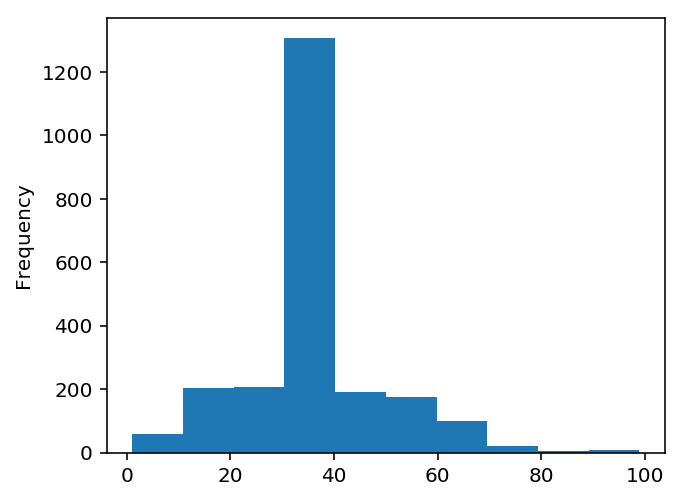

In [114]:
df2['hours-per-week'].plot(kind = 'hist')

Boxplot displaying values distribution of capital-gain attribute per classes:

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

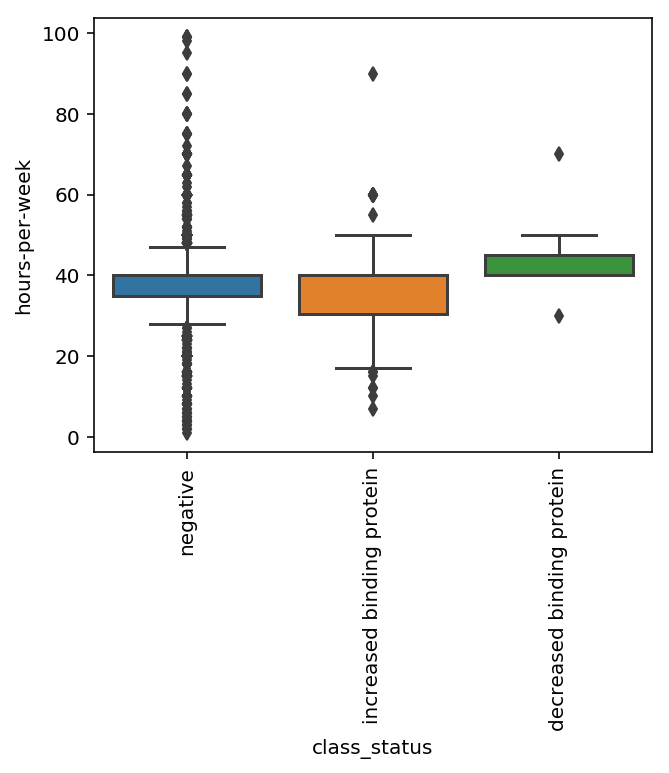

In [115]:
sns.boxplot('class_status','hours-per-week', data=FTI_filled_in)
plt.xticks(rotation=90)

From boxplot above, this attribute would probably at least help to divide *decreased binding protein* class.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


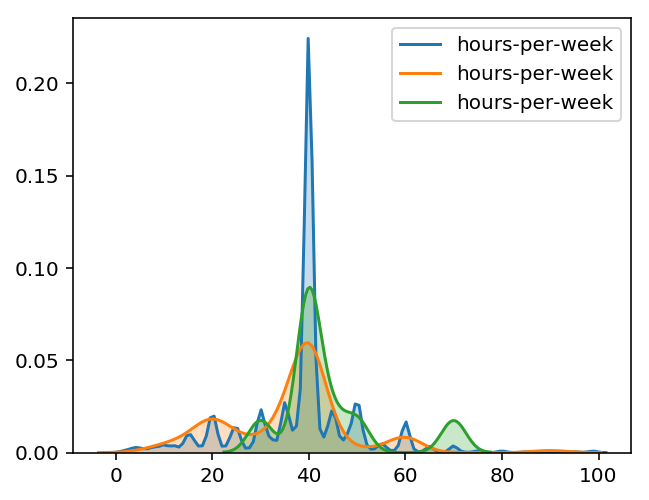

In [116]:
grouped_kdeplot(df2, 'hours-per-week', 'class_status')

#### workclass
Workclass should have no impact on thyroid, but we need to check this up:

Looking at unique values in this column:

In [117]:
df2['workclass'].unique()

array([' Private', ' Federal-gov', ' ?', ' Self-emp-not-inc',
       ' Local-gov', ' State-gov', ' Self-emp-inc', nan, ' Never-worked',
       ' Without-pay'], dtype=object)

Unifying boolean values in this column:

In [118]:
# unifying '?' and nan values, as they are supposed to have the same meaning
df2.loc[df2['workclass'].isnull(), 'workclass'] = '?'

Table of unique values (of this column) distribution through classes:

In [119]:
pd.crosstab(df2.workclass, df2.class_status)

class_status 
 decreased binding protein 
 increased binding protein 
 negative 
 
 
 workclass 
 
 
 
 
 
 
 
 ? 
 1 
 7 
 148 
 
 
 Federal-gov 
 1 
 4 
 65 
 
 
 Local-gov 
 0 
 7 
 142 
 
 
 Never-worked 
 0 
 0 
 1 
 
 
 Private 
 6 
 66 
 1558 
 
 
 Self-emp-inc 
 1 
 3 
 40 
 
 
 Self-emp-not-inc 
 0 
 4 
 126 
 
 
 State-gov 
 0 
 9 
 86 
 
 
 Without-pay 
 0 
 0 
 1 
 
 
 ? 
 0 
 1 
 3

Barplot displaying unique values (of this column) distribution through classes:

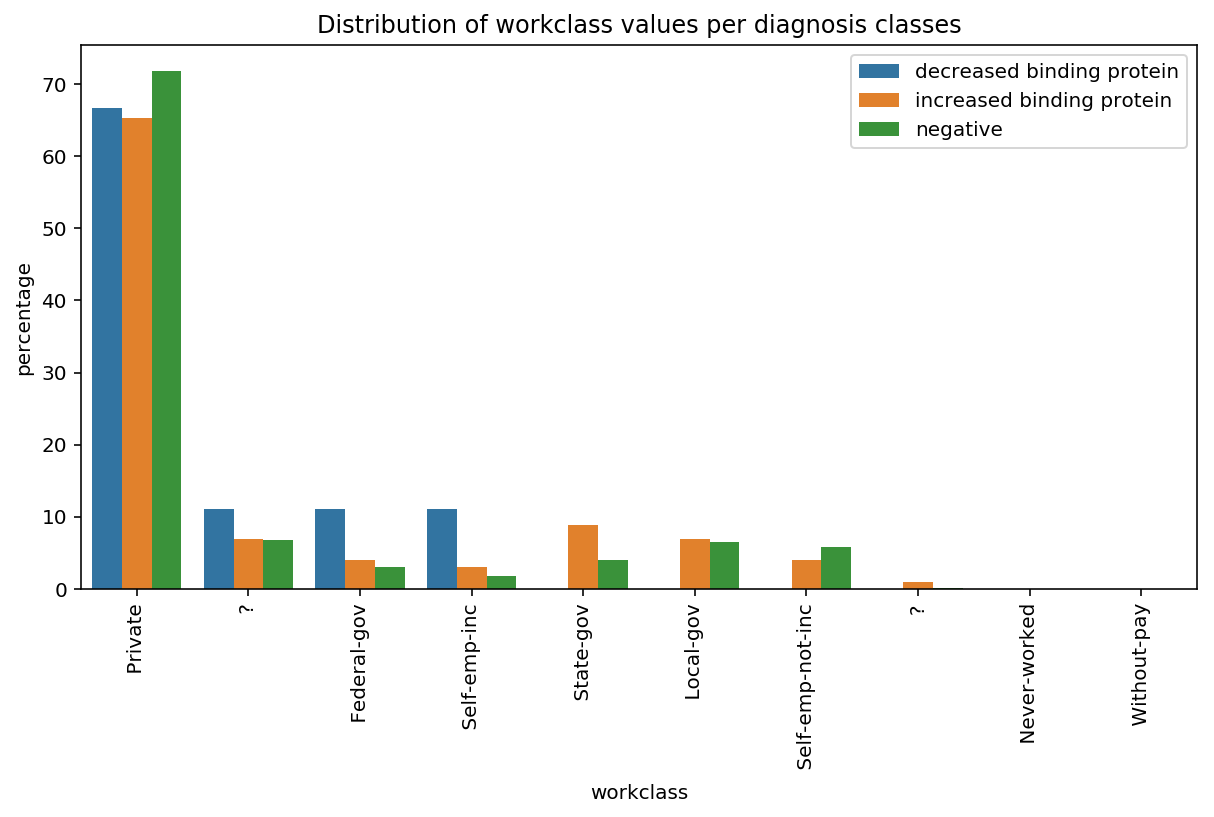

In [120]:
grouped_barplot(df2,'workclass','class_status', title='Distribution of workclass values per diagnosis classes', size= (10,5), rotation=90)

This attribute is not showing any significant difference.

#### personal_info
Looking at unique values in this column:

In [121]:
personal_info_unique = df2['personal_info'].unique()
print('No of unique values: ' + str(len(personal_info_unique)))

No of unique values: 558


There's a lot of unique values, so let's divide the values of 'personal_info' column to get more representative form:

In [122]:
df2['bred'] = df2['personal_info'].str.extract('(^[^|]+)', expand=False).str.strip().str.lower()
df2['origin'] = df2['personal_info'].str.extract('[|](.*)\r', expand=False).str.strip().str.lower()
df2['study'] = df2['personal_info'].str.extract('[\n](.*)--', expand=False).str.strip().str.lower()
df2['status1'] = df2['personal_info'].str.extract('--(.*)[|]', expand=False).str.strip().str.lower()
df2['status2'] = df2['personal_info'].str.extract('--.*[|](.*)', expand=False).str.strip().str.lower()

**Following attributes are just about personal information of patient. This will probably have no impact on our classification, but at least, let's analyse them to learn something about them.**

##### Bred

Looking at unique values in this column:

In [123]:
df2['bred'].unique()

array(['white', 'black', 'asian-pac-islander', 'other',
       'amer-indian-eskimo', nan], dtype=object)

Table of unique values (of this column) distribution through classes:

In [124]:
pd.crosstab(df2['bred'], df2.class_status)

class_status 
 decreased binding protein 
 increased binding protein 
 negative 
 
 
 bred 
 
 
 
 
 
 
 
 amer-indian-eskimo 
 0 
 2 
 21 
 
 
 asian-pac-islander 
 1 
 1 
 61 
 
 
 black 
 2 
 12 
 247 
 
 
 other 
 0 
 1 
 19 
 
 
 white 
 6 
 85 
 1818

Barplot displaying unique values (of this column) distribution through classes:

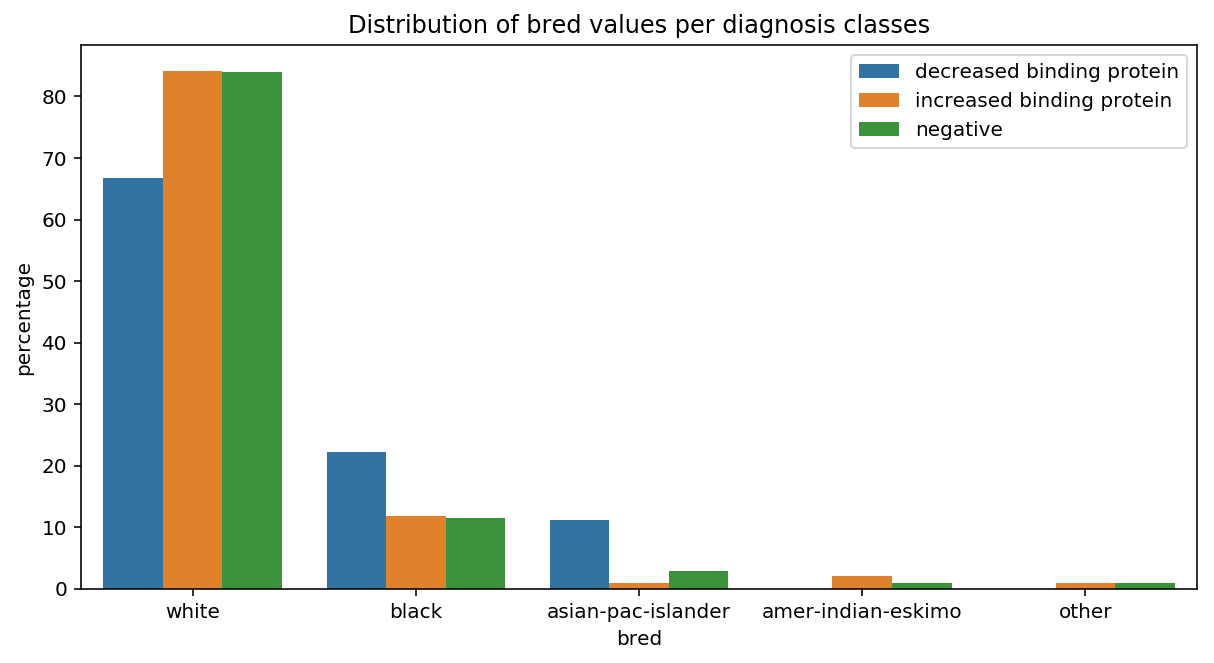

In [125]:
grouped_barplot(df2,'bred','class_status', title ='Distribution of bred values per diagnosis classes', size= (10,5), rotation=0)

##### Origin

Looking at unique values in this column:

In [126]:
df2['origin'].unique()

array(['united-states', 'mexico', 'haiti', 'india', 'china',
       'dominican-republic', '?', 'cuba', nan, 'el-salvador', 'guatemala',
       'philippines', 'jamaica', 'south', 'france', 'puerto-rico',
       'canada', 'cambodia', 'thailand', 'italy', 'japan', 'peru',
       'germany', 'england', 'nicaragua', 'poland', 'vietnam', 'ecuador',
       'taiwan', 'greece', 'ireland', 'iran', 'columbia',
       'outlying-us(guam-usvi-etc)'], dtype=object)

Table of unique values (of this column) distribution through classes:

In [127]:
pd.crosstab(df2['origin'], df2.class_status)

class_status 
 decreased binding protein 
 increased binding protein 
 negative 
 
 
 origin 
 
 
 
 
 
 
 
 ? 
 1 
 0 
 28 
 
 
 cambodia 
 0 
 0 
 2 
 
 
 canada 
 0 
 0 
 8 
 
 
 china 
 0 
 0 
 5 
 
 
 columbia 
 0 
 0 
 2 
 
 
 cuba 
 0 
 0 
 9 
 
 
 dominican-republic 
 0 
 0 
 9 
 
 
 ecuador 
 0 
 0 
 4 
 
 
 el-salvador 
 0 
 0 
 9 
 
 
 england 
 0 
 0 
 4 
 
 
 france 
 0 
 0 
 3 
 
 
 germany 
 0 
 0 
 9 
 
 
 greece 
 0 
 0 
 3 
 
 
 guatemala 
 0 
 0 
 7 
 
 
 haiti 
 0 
 0 
 9 
 
 
 india 
 0 
 1 
 4 
 
 
 iran 
 0 
 0 
 2 
 
 
 ireland 
 0 
 0 
 1 
 
 
 italy 
 0 
 0 
 7 
 
 
 jamaica 
 0 
 1 
 8 
 
 
 japan 
 0 
 0 
 7 
 
 
 mexico 
 0 
 1 
 39 
 
 
 nicaragua 
 1 
 1 
 2 
 
 
 outlying-us(guam-usvi-etc) 
 0 
 0 
 1 
 
 
 peru 
 0 
 0 
 4 
 
 
 philippines 
 0 
 0 
 12 
 
 
 poland 
 0 
 0 
 5 
 
 
 puerto-rico 
 0 
 1 
 13 
 
 
 south 
 0 
 0 
 3 
 
 
 taiwan 
 0 
 0 
 3 
 
 
 thailand 
 0 
 0 
 2 
 
 
 united-states 
 7 
 96 
 1941 
 
 
 vietnam 
 0 
 0 
 1

Barplot displaying unique values (of this column) distribution through classes:

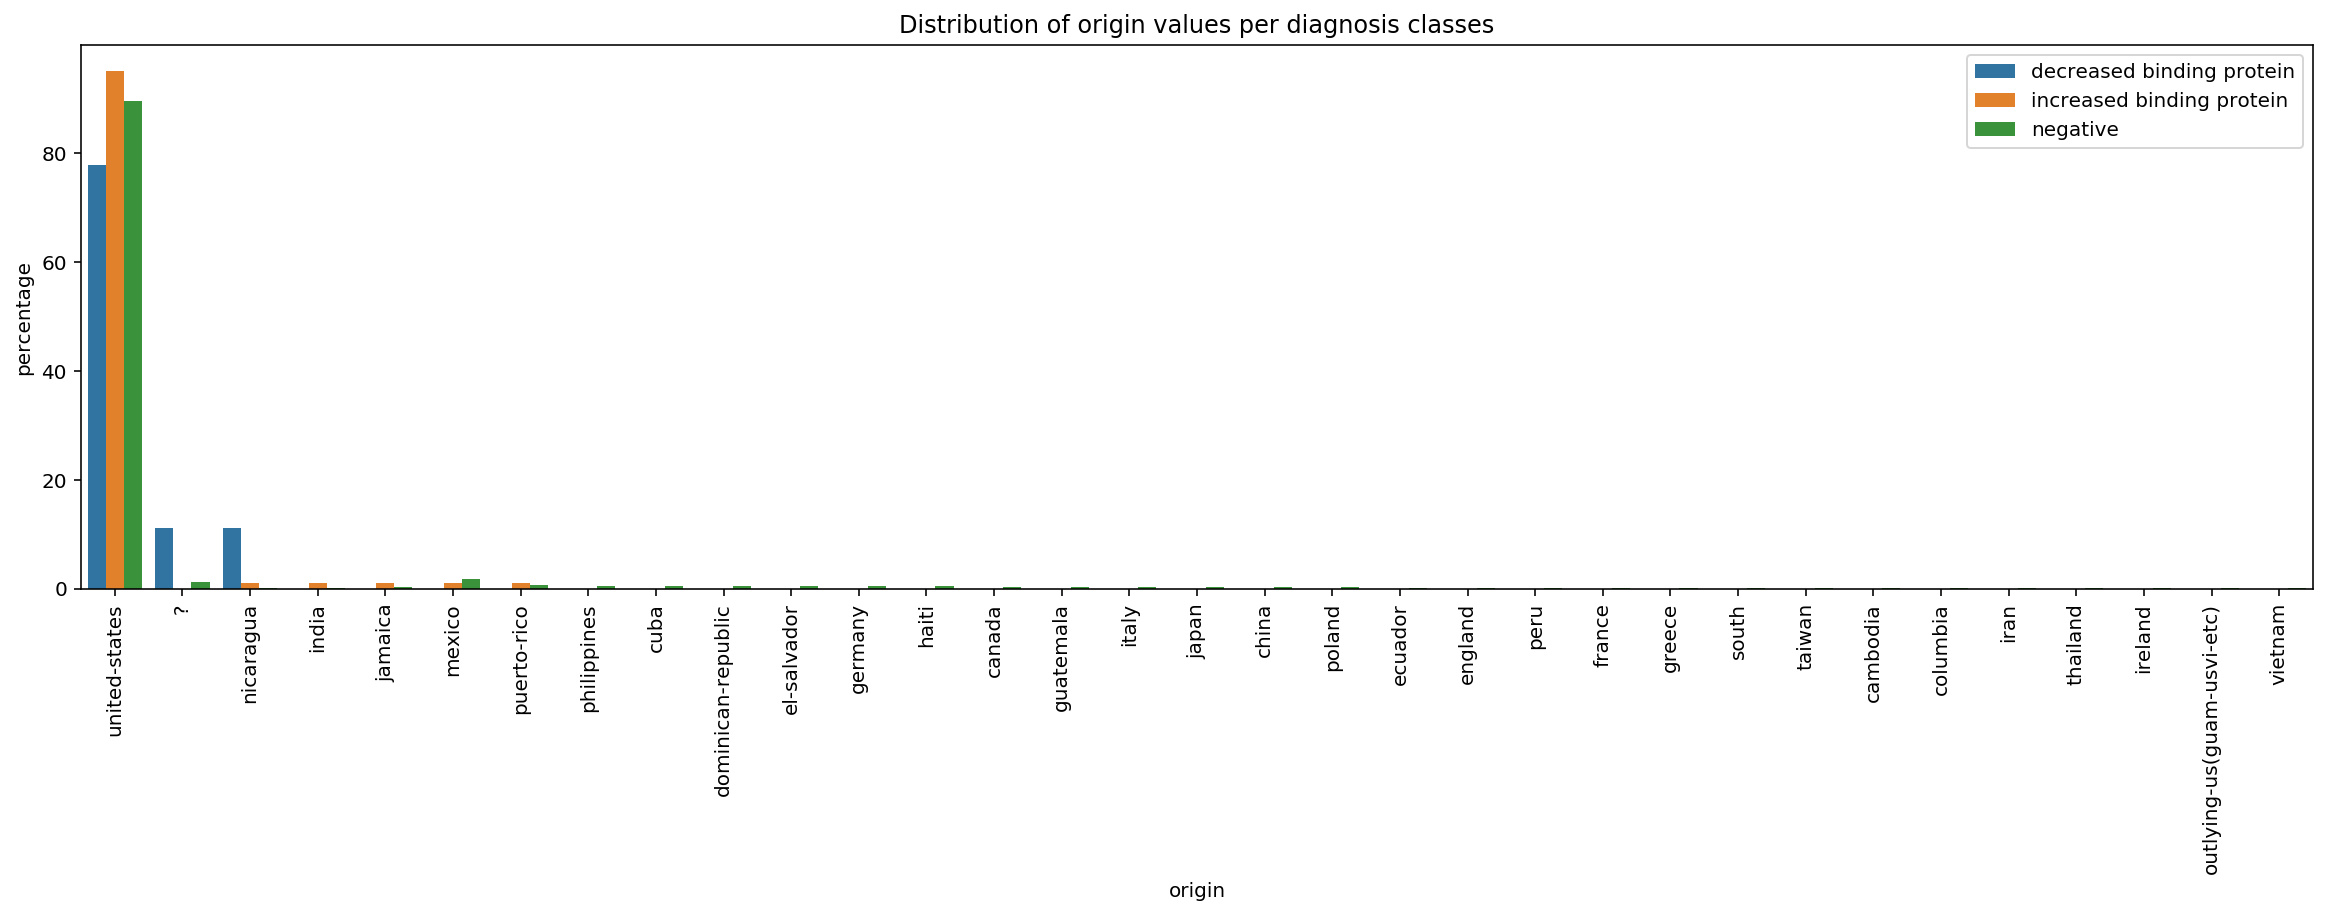

In [128]:
grouped_barplot(df2,'origin','class_status', title ='Distribution of origin values per diagnosis classes', size= (20,5), rotation=90)

##### Study

Looking at unique values in this column:

In [129]:
study_unique = df2['study'].unique()
print('No of unique values: ' + str(len(study_unique)))
print('Unique values:\n' + str(study_unique))

No of unique values: 25
Unique values:
['bachelors' 'some_college' 'hs-grad' '1st-4th' 'some-college'
 'assoc-acdm' '11th' 'masters' '10th' '9th' '7th-8th' '5th-6th' '12th' nan
 'assoc-voc' 'prof-school' 'doctorate' 'assoc_voc' 'preschool' 'hs_grad'
 'assoc_acdm' '1st_4th' '5th_6th' 'prof_school' '7th_8th']


There are several values differing only in separator which is either '-' or '_'. Let's unify these values.

In [130]:
df2['study'] = df2['study'].apply(lambda x: unify_words(str(x)))

study_unique = df2['study'].unique()
print('No of unique values: ' + str(len(study_unique)))
print('Unique values:\n' + str(study_unique))

No of unique values: 17
Unique values:
['bachelors' 'some-college' 'hs-grad' '1st-4th' 'assoc-acdm' '11th'
 'masters' '10th' '9th' '7th-8th' '5th-6th' '12th' 'nan' 'assoc-voc'
 'prof-school' 'doctorate' 'preschool']


Table of unique values (of this column) distribution through classes:

In [131]:
pd.crosstab(df2['study'], df2.class_status)

class_status 
 decreased binding protein 
 increased binding protein 
 negative 
 
 
 study 
 
 
 
 
 
 
 
 10th 
 0 
 1 
 68 
 
 
 11th 
 1 
 0 
 93 
 
 
 12th 
 0 
 2 
 30 
 
 
 1st-4th 
 0 
 1 
 14 
 
 
 5th-6th 
 0 
 1 
 24 
 
 
 7th-8th 
 0 
 1 
 29 
 
 
 9th 
 0 
 1 
 26 
 
 
 assoc-acdm 
 0 
 0 
 83 
 
 
 assoc-voc 
 0 
 3 
 87 
 
 
 bachelors 
 1 
 17 
 334 
 
 
 doctorate 
 0 
 2 
 23 
 
 
 hs-grad 
 2 
 34 
 701 
 
 
 masters 
 0 
 7 
 101 
 
 
 nan 
 0 
 0 
 4 
 
 
 preschool 
 0 
 0 
 2 
 
 
 prof-school 
 0 
 2 
 22 
 
 
 some-college 
 5 
 29 
 529

Barplot displaying unique values (of this column) distribution through classes:

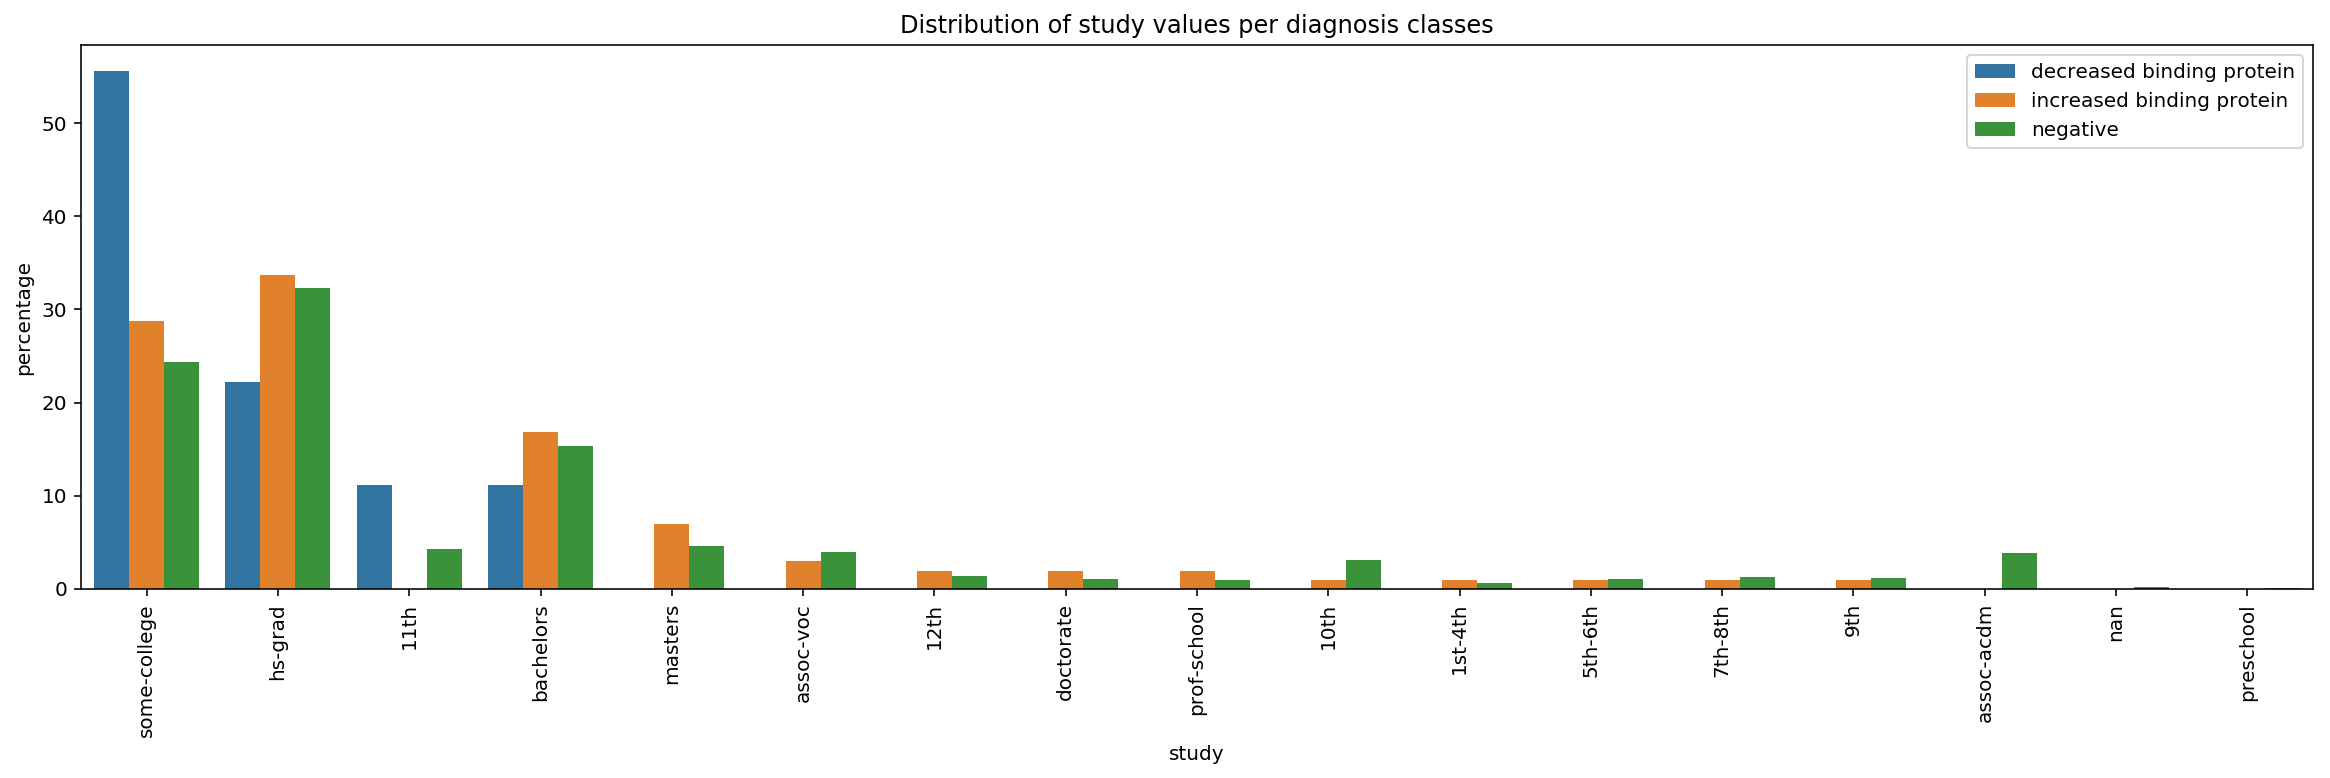

In [132]:
grouped_barplot(df2,'study','class_status', title ='Distribution of study values per diagnosis classes' ,size= (20,5), rotation=90)

##### Status1

Looking at unique values in this column:

In [133]:
df2['status1'].unique()

array(['separated', 'never-married', 'married-civ-spouse', 'widowed',
       'married-spouse-absent', 'divorced', nan, 'married-af-spouse'],
      dtype=object)

Table of unique values (of this column) distribution through classes:

In [134]:
pd.crosstab(df2['status1'], df2.class_status)

class_status 
 decreased binding protein 
 increased binding protein 
 negative 
 
 
 status1 
 
 
 
 
 
 
 
 divorced 
 1 
 19 
 392 
 
 
 married-af-spouse 
 0 
 0 
 4 
 
 
 married-civ-spouse 
 3 
 26 
 664 
 
 
 married-spouse-absent 
 0 
 1 
 38 
 
 
 never-married 
 5 
 47 
 845 
 
 
 separated 
 0 
 4 
 107 
 
 
 widowed 
 0 
 4 
 116

Barplot displaying unique values (of this column) distribution through classes:

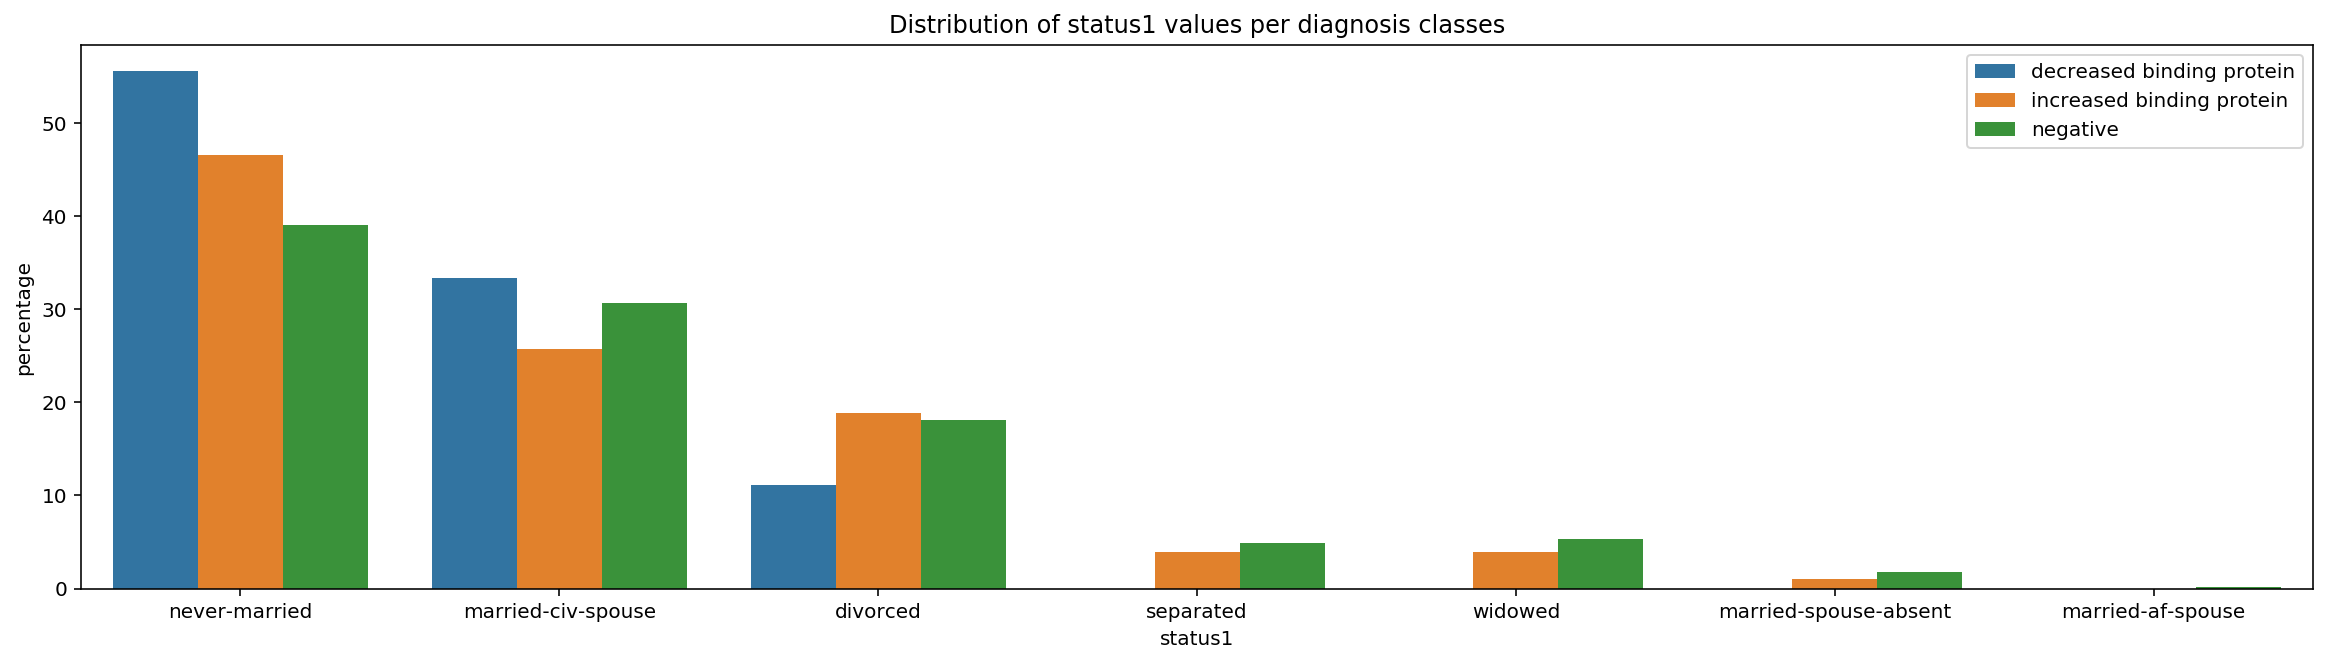

In [135]:
grouped_barplot(df2,'status1','class_status', title ='Distribution of status1 values per diagnosis classes', size= (20,5), rotation=0)

##### Status2

Looking at unique values in this column:

In [136]:
df2['status2'].unique()

array(['unmarried', 'other-relative', 'husband', 'not-in-family',
       'own-child', 'wife', nan], dtype=object)

Table of unique values (of this column) distribution through classes:

In [137]:
pd.crosstab(df2['status2'], df2.class_status)

class_status 
 decreased binding protein 
 increased binding protein 
 negative 
 
 
 status2 
 
 
 
 
 
 
 
 husband 
 1 
 9 
 456 
 
 
 not-in-family 
 3 
 28 
 676 
 
 
 other-relative 
 0 
 4 
 79 
 
 
 own-child 
 1 
 25 
 373 
 
 
 unmarried 
 2 
 19 
 394 
 
 
 wife 
 2 
 16 
 188

Barplot displaying unique values (of this column) distribution through classes:

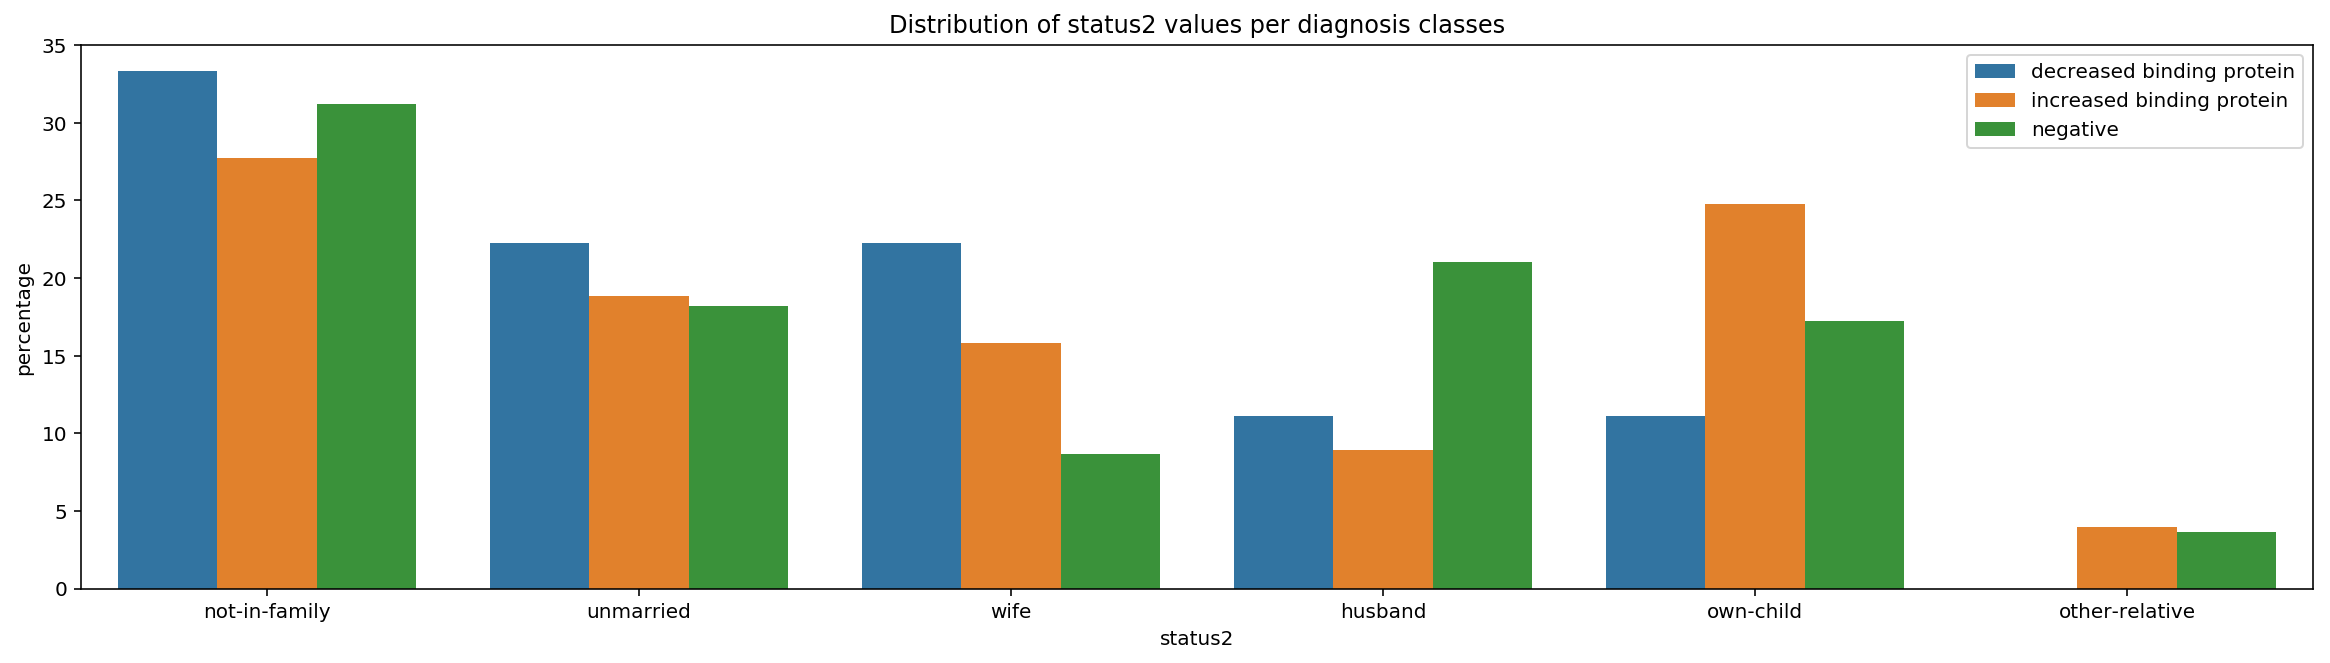

In [138]:
grouped_barplot(df2,'status2','class_status', title ='Distribution of status2 values per diagnosis classes', size= (20,5), rotation=0)

### on antithyroid medication

Looking at unique values in this column:

In [139]:
df2['on antithyroid medication'].unique()

array(['f', 't', nan, 'f.2'], dtype=object)

Unifying boolean values in this column:

In [140]:
# again, fix problem with boolean unifying
df2['on antithyroid medication'] = df2['on antithyroid medication'].apply(lambda x: unify_boolean(str(x)))

Table of unique values (of this column) distribution through classes:

In [141]:
pd.crosstab(df2['on antithyroid medication'], df2.class_status)

class_status 
 decreased binding protein 
 increased binding protein 
 negative 
 
 
 on antithyroid medication 
 
 
 
 
 
 
 
 f 
 9 
 95 
 2140 
 
 
 t 
 0 
 4 
 23

Pie chart displaying percentual distribution of boolean values of this column:

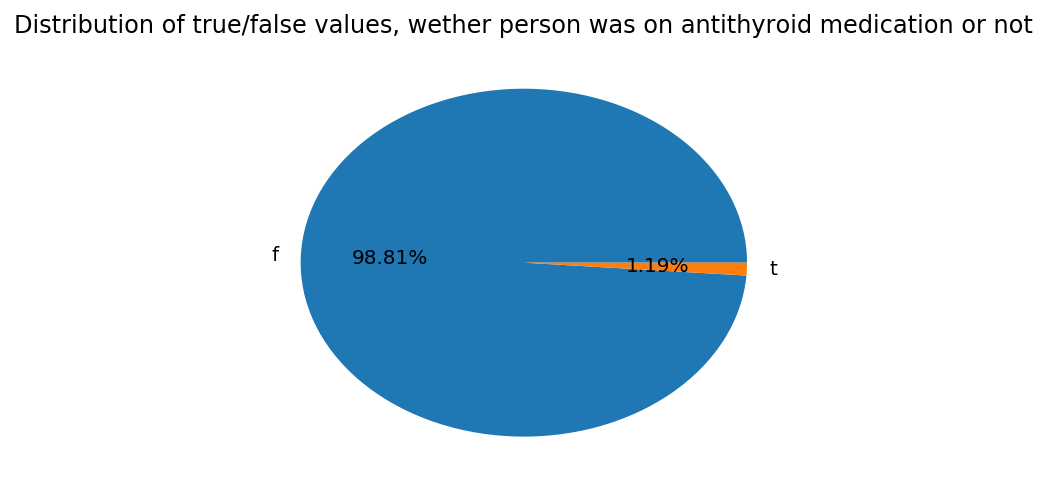

In [142]:
pie_plot(df2, 'on antithyroid medication', title='Distribution of true/false values, wether person was on antithyroid medication or not')

Barplot displaying unique values (of this column) distribution through classes:

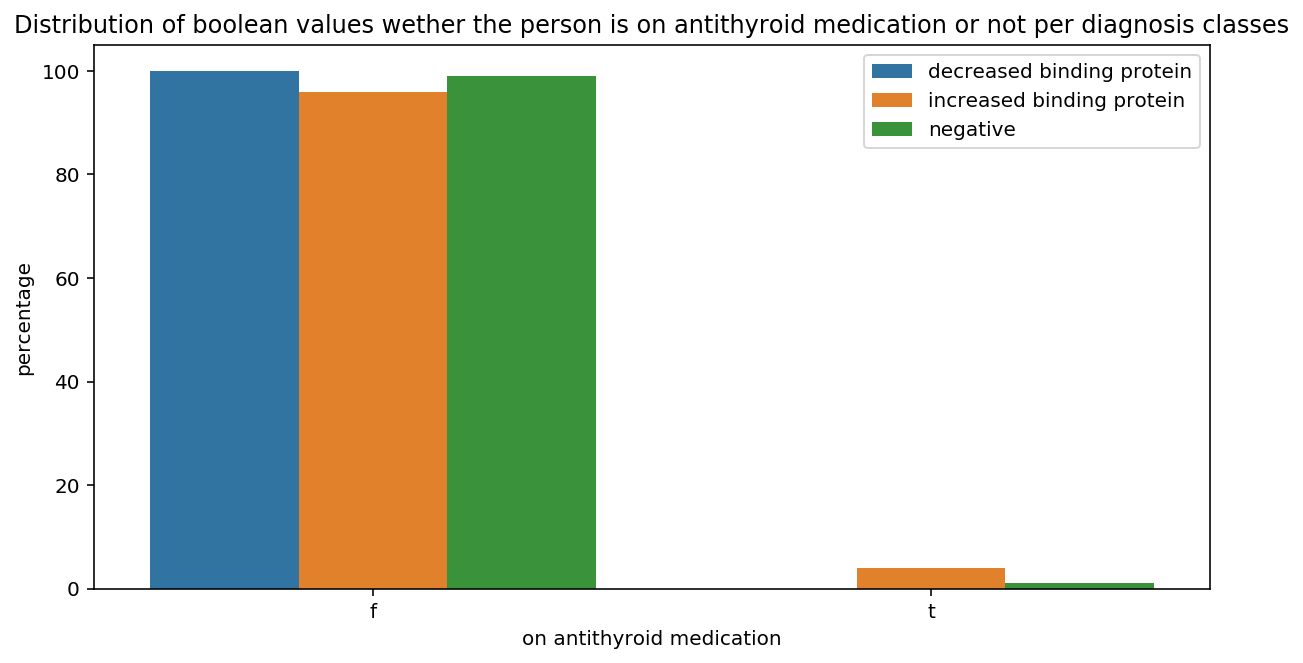

In [143]:
grouped_barplot(df2,'on antithyroid medication','class_status',title='Distribution of boolean values wether the person is on antithyroid medication or not per diagnosis classes', size= (10,5), rotation=0)

This attribute doesn't seem to bring any significant difference between class_status values.

### referral source

Looking at unique values in this column:

In [144]:
df2['referral source'].unique()

array(['other', 'SVI', 'SVHC', 'STMW', 'SVHD', nan], dtype=object)

Table of unique values (of this column) distribution through classes:

In [145]:
pd.crosstab(df2['referral source'], df2.class_status)

class_status 
 decreased binding protein 
 increased binding protein 
 negative 
 
 
 referral source 
 
 
 
 
 
 
 
 STMW 
 0 
 28 
 43 
 
 
 SVHC 
 1 
 4 
 215 
 
 
 SVHD 
 0 
 1 
 24 
 
 
 SVI 
 6 
 8 
 622 
 
 
 other 
 2 
 60 
 1261

Barplot displaying unique values (of this column) distribution through classes:

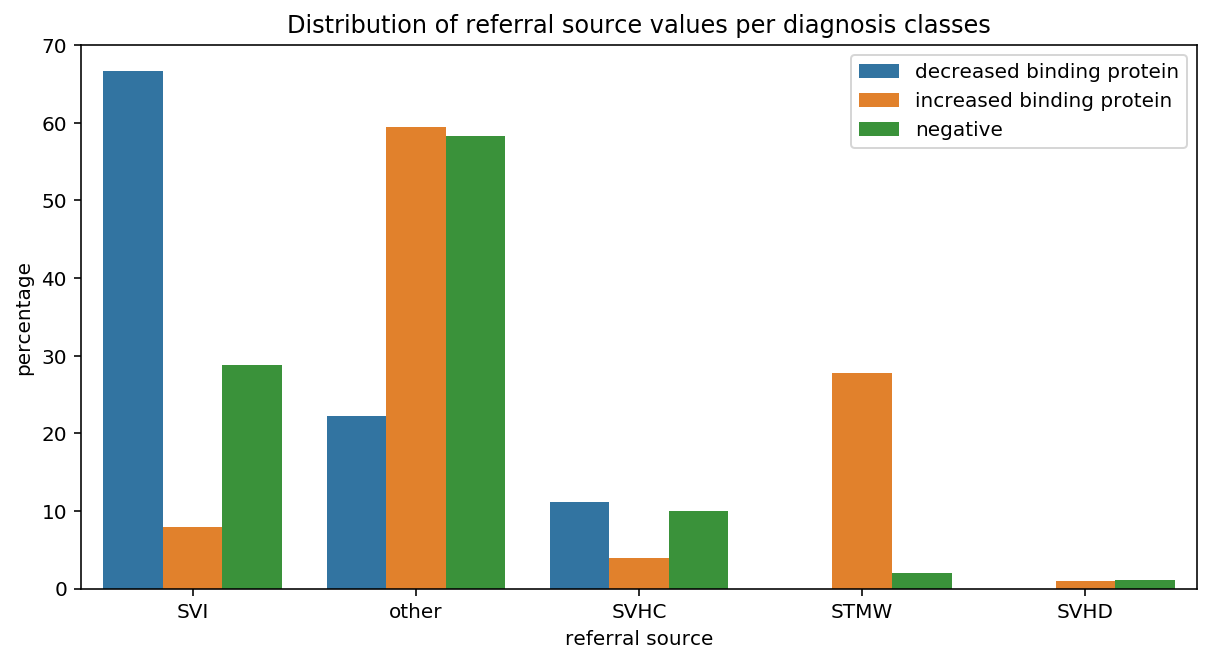

In [146]:
grouped_barplot(df2,'referral source','class_status', title = 'Distribution of referral source values per diagnosis classes', size= (10,5), rotation=0)

This attribute's values seem to bring some significant differences. However, it requires further analysis.

### education-num

Looking at unique values in this column:

In [147]:
df2['education-num'].unique()

array([   13.,    10.,     9.,     2., -1000.,    12.,     7.,    14.,
           6.,     5., -1400.,     4.,    nan,   600.,  1300.,     3.,
           8.,   900.,    11., -1300., -1200., -1600.,  -900.,    16.,
        -100.,  -500.,  1000.,    15.,   500.,  1400., -1100.,   700.,
         300.,  -700., -1500.,  -200.,  1200.,  1600.,  -600.,  -400.,
        1100.,  1500.,   400.,   200.])

Table of unique values (of this column) distribution through classes:

In [148]:
pd.crosstab(df2['education-num'], df2.class_status)

class_status 
 decreased binding protein 
 increased binding protein 
 negative 
 
 
 education-num 
 
 
 
 
 
 
 
 -1600.0 
 0 
 0 
 1 
 
 
 -1500.0 
 0 
 0 
 1 
 
 
 -1400.0 
 0 
 1 
 3 
 
 
 -1300.0 
 0 
 0 
 22 
 
 
 -1200.0 
 0 
 0 
 4 
 
 
 -1100.0 
 0 
 0 
 5 
 
 
 -1000.0 
 0 
 1 
 24 
 
 
 -900.0 
 0 
 2 
 30 
 
 
 -700.0 
 0 
 0 
 2 
 
 
 -600.0 
 0 
 0 
 5 
 
 
 -500.0 
 0 
 0 
 1 
 
 
 -400.0 
 0 
 0 
 1 
 
 
 -200.0 
 0 
 0 
 1 
 
 
 -100.0 
 0 
 0 
 1 
 
 
 2.0 
 0 
 0 
 9 
 
 
 3.0 
 0 
 1 
 21 
 
 
 4.0 
 0 
 1 
 20 
 
 
 5.0 
 0 
 0 
 21 
 
 
 6.0 
 0 
 1 
 48 
 
 
 7.0 
 1 
 0 
 80 
 
 
 8.0 
 0 
 2 
 25 
 
 
 9.0 
 2 
 27 
 585 
 
 
 10.0 
 5 
 26 
 417 
 
 
 11.0 
 0 
 1 
 73 
 
 
 12.0 
 0 
 0 
 72 
 
 
 13.0 
 0 
 14 
 266 
 
 
 14.0 
 0 
 6 
 81 
 
 
 15.0 
 0 
 1 
 16 
 
 
 16.0 
 0 
 1 
 20 
 
 
 200.0 
 0 
 0 
 1 
 
 
 300.0 
 0 
 0 
 2 
 
 
 400.0 
 0 
 0 
 1 
 
 
 500.0 
 0 
 0 
 1 
 
 
 600.0 
 0 
 0 
 6 
 
 
 700.0 
 0 
 0 
 4 
 
 
 900.0 
 0 
 3 
 23 
 
 
 1000.0 
 0 
 1 
 29 
 
 
 1100.0 
 0 
 0 
 3 
 
 
 1200.0 
 0 
 0 
 2 
 
 
 1300.0 
 0 
 1 
 15 
 
 
 1400.0 
 0 
 0 
 5 
 
 
 1500.0 
 0 
 0 
 2 
 
 
 1600.0 
 0 
 0 
 1

Barplot displaying unique values (of this column) distribution through classes:

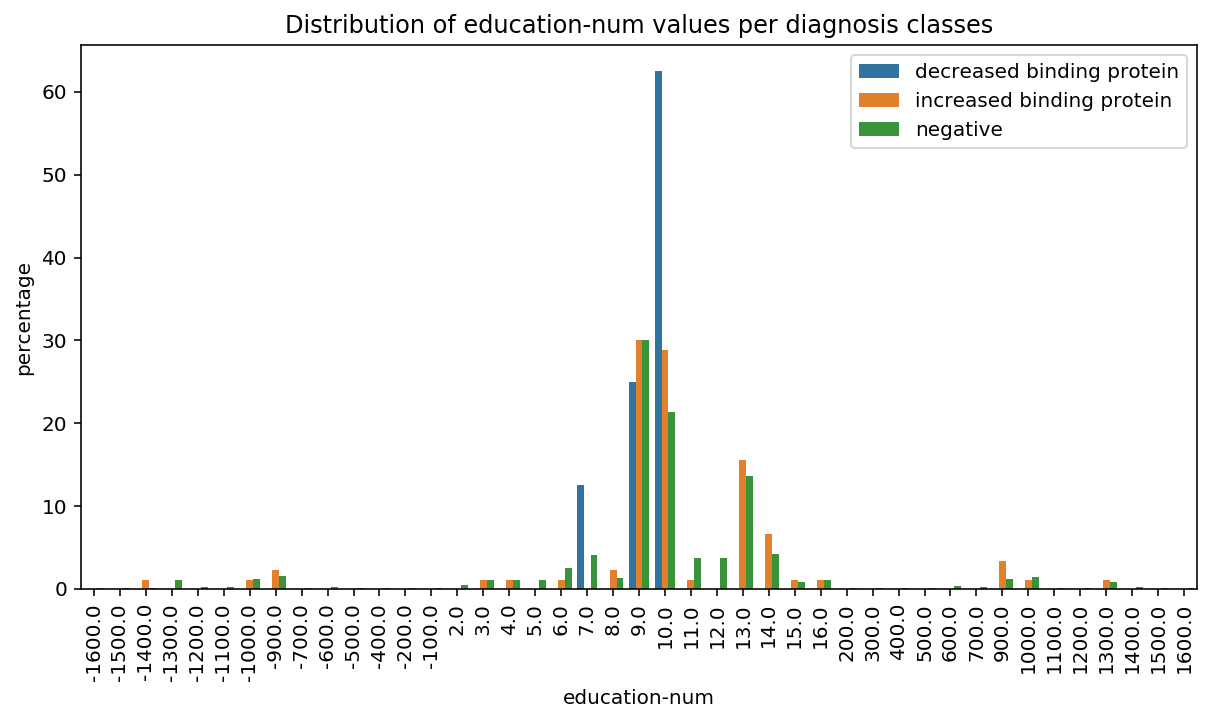

In [149]:
grouped_barplot(df2,'education-num','class_status',title = 'Distribution of education-num values per diagnosis classes',size= (10,5), rotation=90)

Some of this attribute's values seem to bring some significant differences. However, it requires further analysis.

### psych

Looking at unique values in this column:

In [150]:
df2['psych'].unique()

array(['f', 't', nan, 'f.13'], dtype=object)

Unifying boolean values in this column:

In [151]:
# again, fix problem with boolean unifying
df2['psych'] = df2['psych'].apply(lambda x: unify_boolean(str(x)))

Table of unique values (of this column) distribution through classes:

In [152]:
pd.crosstab(df2['psych'], df2.class_status)

class_status 
 decreased binding protein 
 increased binding protein 
 negative 
 
 
 psych 
 
 
 
 
 
 
 
 f 
 8 
 100 
 2053 
 
 
 t 
 1 
 1 
 109

Barplot displaying unique values (of this column) distribution through classes:

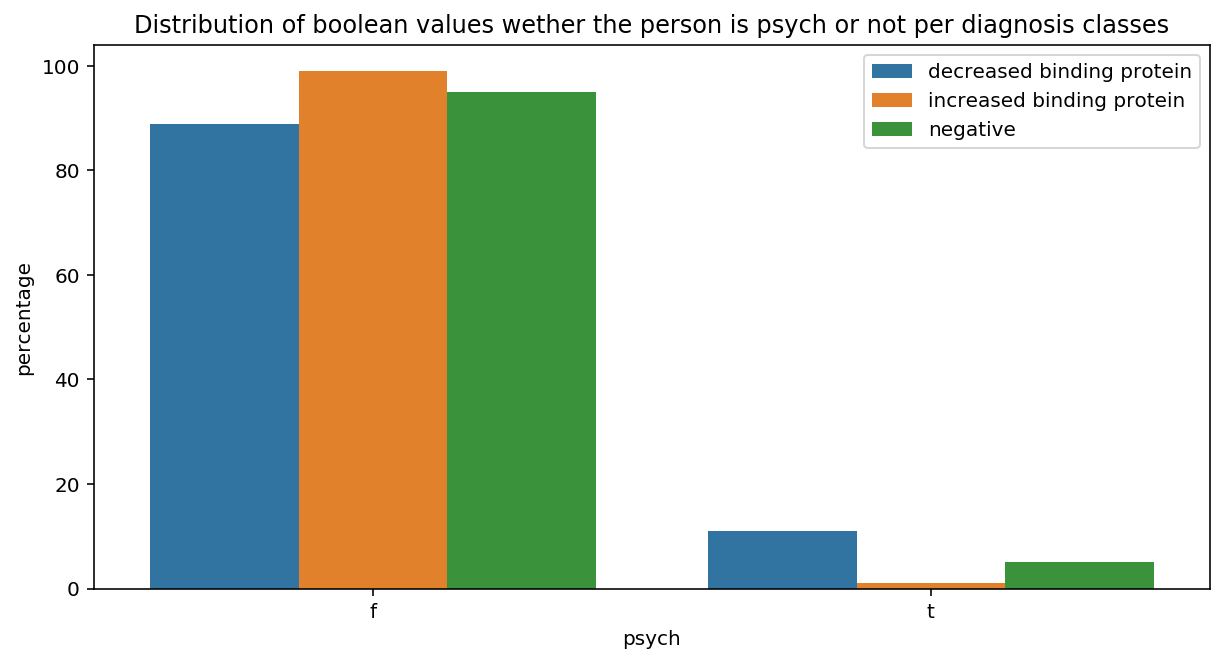

In [153]:
grouped_barplot(df2,'psych','class_status', title='Distribution of boolean values wether the person is psych or not per diagnosis classes',size= (10,5), rotation=0)

This attribute doesn't seem to bring any difference within class_status values.

### occupation

Let's check occupation of patients:

Looking at unique values in this column:

In [154]:
df2['occupation'].unique()

array([' Prof-specialty', ' Other-service', ' Machine-op-inspct',
       ' Adm-clerical', ' Sales', ' ?', ' Tech-support',
       ' Exec-managerial', ' Craft-repair', ' Transport-moving',
       ' Farming-fishing', ' Protective-serv', ' Priv-house-serv',
       ' Handlers-cleaners', nan], dtype=object)

Unifying boolean values in this column:

In [155]:
# Unifying 'nan' values and ' ?' to '?'
df2.loc[(df2['occupation'].isnull()) | (df2['occupation'] == ' ?') , 'occupation'] = '?'

Table of unique values (of this column) distribution through classes:

In [156]:
pd.crosstab(df2['occupation'], df2.class_status)

class_status 
 decreased binding protein 
 increased binding protein 
 negative 
 
 
 occupation 
 
 
 
 
 
 
 
 Adm-clerical 
 1 
 22 
 358 
 
 
 Craft-repair 
 0 
 1 
 167 
 
 
 Exec-managerial 
 3 
 13 
 252 
 
 
 Farming-fishing 
 0 
 1 
 44 
 
 
 Handlers-cleaners 
 1 
 0 
 48 
 
 
 Machine-op-inspct 
 2 
 1 
 127 
 
 
 Other-service 
 0 
 16 
 334 
 
 
 Priv-house-serv 
 0 
 1 
 27 
 
 
 Prof-specialty 
 1 
 16 
 247 
 
 
 Protective-serv 
 0 
 2 
 33 
 
 
 Sales 
 0 
 14 
 266 
 
 
 Tech-support 
 0 
 5 
 56 
 
 
 Transport-moving 
 0 
 2 
 55 
 
 
 ? 
 1 
 7 
 156

Barplot displaying unique values (of this column) distribution through classes:

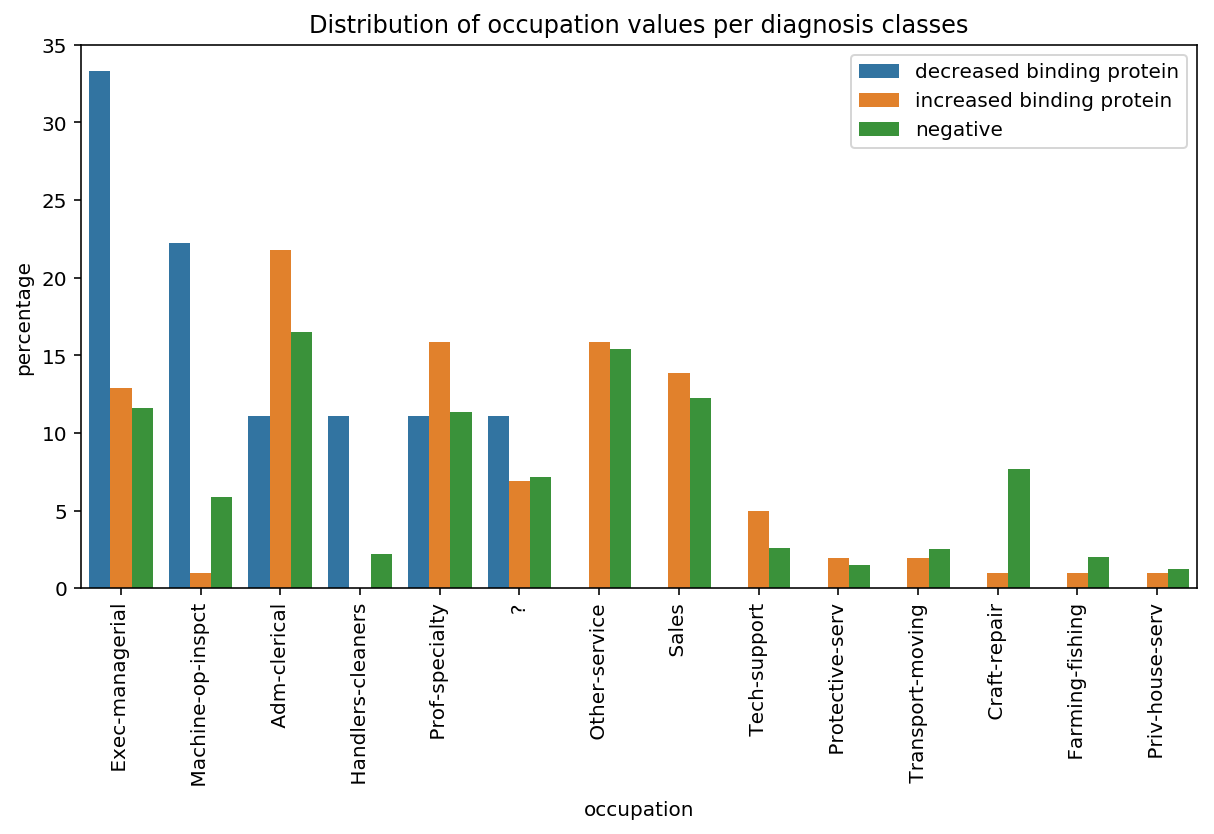

In [157]:
grouped_barplot(df2,'occupation','class_status', title = 'Distribution of occupation values per diagnosis classes', size= (10,5), rotation=90)

There are very significant differences between occupations, but we should think if they can cause some problems with thyroid, or it is just coincidence.

### TBG measured

As usual in attributes with "measured", that is probably attribute with just boolean values. Let's check this up:

Looking at unique values in this column:

In [158]:
df2['TBG measured'].unique()

array(['f', nan, 'f.14'], dtype=object)

Unifying boolean values in this column:

In [159]:
# again, fix problem with boolean unifying
df2['TBG measured'] = df2['TBG measured'].apply(lambda x: unify_boolean(str(x)))

Pie chart displaying percentual distribution of boolean values of this column:

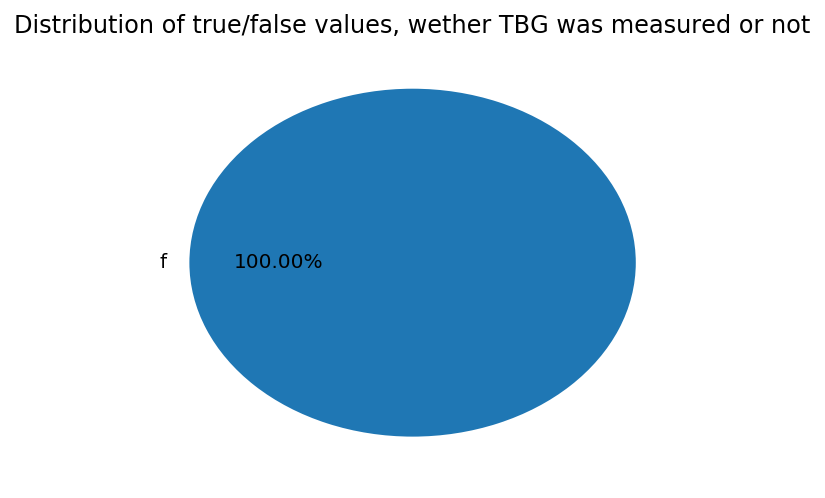

In [160]:
pie_plot(df2, 'TBG measured', title='Distribution of true/false values, wether TBG was measured or not')

TBG measured attribute consists just of false values, so will probably not be used in classification.

### TBG

No need to analyse 'TBG' as 'TBG measured' contains only FALSE values so there are no values in 'TBG' column

### pregnant

Pregnant attribute is interesting. Maybe it would show something interesting for classification, but also it can be used to determine NULL values in *sex* attribute.

Looking at unique values in this column:

In [161]:
df2['pregnant'].unique()

array([nan, 'f', '??', 't', 'f.4'], dtype=object)

Unifying boolean values in this column:

In [162]:
# again, fix problem with boolean unifying
df2['pregnant'] = df2['pregnant'].apply(lambda x: unify_boolean(str(x)))
# Unifying 'nan' values and '??' to '?'
df2.loc[(df2['pregnant'].isnull()) | (df2['pregnant'] == '??') , 'pregnant'] = '?'

Table of unique values (of this column) distribution through classes:

In [163]:
pd.crosstab(df2['pregnant'], df2.class_status)

class_status 
 decreased binding protein 
 increased binding protein 
 negative 
 
 
 pregnant 
 
 
 
 
 
 
 
 ? 
 2 
 12 
 221 
 
 
 f 
 7 
 70 
 1939 
 
 
 t 
 0 
 19 
 10

Barplot displaying unique values (of this column) distribution through classes:

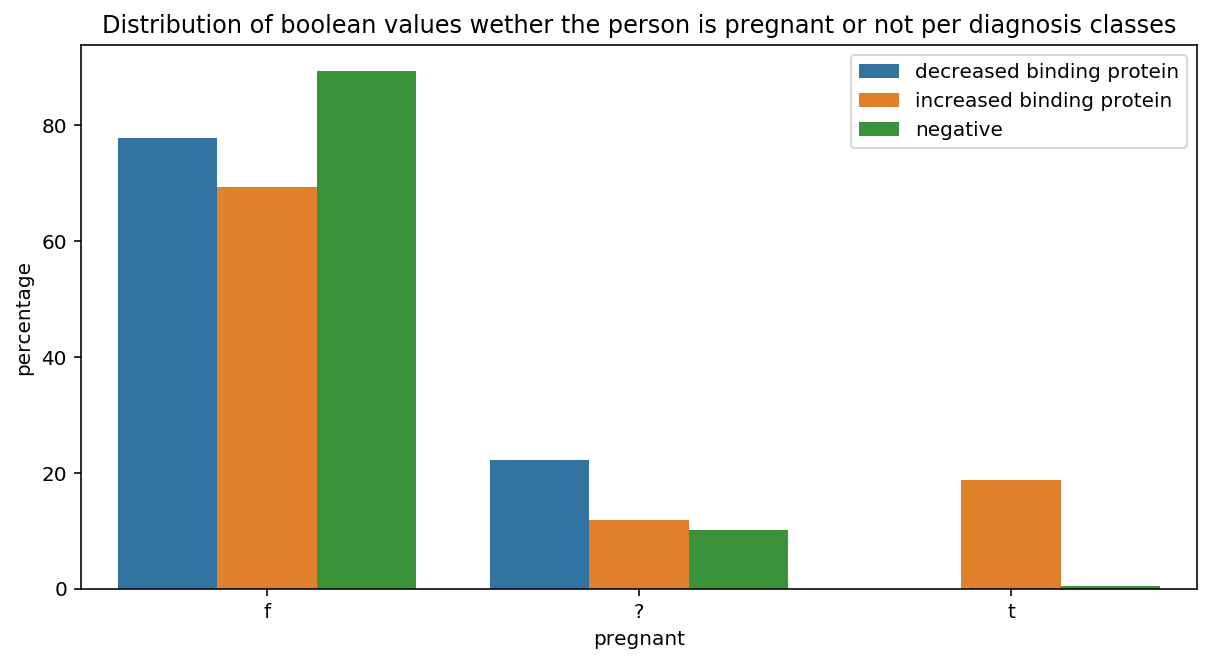

In [164]:
grouped_barplot(df2,'pregnant','class_status',title='Distribution of boolean values wether the person is pregnant or not per diagnosis classes',size= (10,5), rotation=0)

Pregnancy can be used in classification, because it holds some information (like increased binding protein is more significant in pregnancy).

### Pair analysis

When analysing dataset, also pair analysis can be very useful. Some values can show something interesting to predict status of patient when are combined with another attributes. 

Correlation between numerical attributes can show something interesting:


In [165]:
df2.corr()

TT4 
 T4U 
 capital-loss 
 capital-gain 
 TSH 
 T3 
 fnlwgt 
 FTI 
 hours-per-week 
 education-num 
 
 
 
 
 TT4 
 1.000000 
 0.434117 
 0.009195 
 -0.049862 
 -0.252906 
 0.563452 
 0.021995 
 0.656588 
 -0.057453 
 0.000639 
 
 
 T4U 
 0.434117 
 1.000000 
 0.021979 
 -0.048072 
 0.073722 
 0.452879 
 0.020565 
 -0.165679 
 -0.077032 
 0.004690 
 
 
 capital-loss 
 0.009195 
 0.021979 
 1.000000 
 -0.026834 
 0.003613 
 -0.003149 
 -0.011461 
 0.001603 
 0.017312 
 -0.009961 
 
 
 capital-gain 
 -0.049862 
 -0.048072 
 -0.026834 
 1.000000 
 0.021072 
 -0.024604 
 0.005044 
 -0.004862 
 0.094657 
 0.008264 
 
 
 TSH 
 -0.252906 
 0.073722 
 0.003613 
 0.021072 
 1.000000 
 -0.175486 
 0.030401 
 -0.233095 
 0.010673 
 -0.003637 
 
 
 T3 
 0.563452 
 0.452879 
 -0.003149 
 -0.024604 
 -0.175486 
 1.000000 
 0.045267 
 0.266698 
 -0.048073 
 -0.022187 
 
 
 fnlwgt 
 0.021995 
 0.020565 
 -0.011461 
 0.005044 
 0.030401 
 0.045267 
 1.000000 
 0.013976 
 0.013351 
 0.038313 
 
 
 FTI 
 0.656588 
 -0.165679 
 0.001603 
 -0.004862 
 -0.233095 
 0.266698 
 0.013976 
 1.000000 
 0.029606 
 -0.009756 
 
 
 hours-per-week 
 -0.057453 
 -0.077032 
 0.017312 
 0.094657 
 0.010673 
 -0.048073 
 0.013351 
 0.029606 
 1.000000 
 0.005379 
 
 
 education-num 
 0.000639 
 0.004690 
 -0.009961 
 0.008264 
 -0.003637 
 -0.022187 
 0.038313 
 -0.009756 
 0.005379 
 1.000000

Let's use heatmap to see it better:

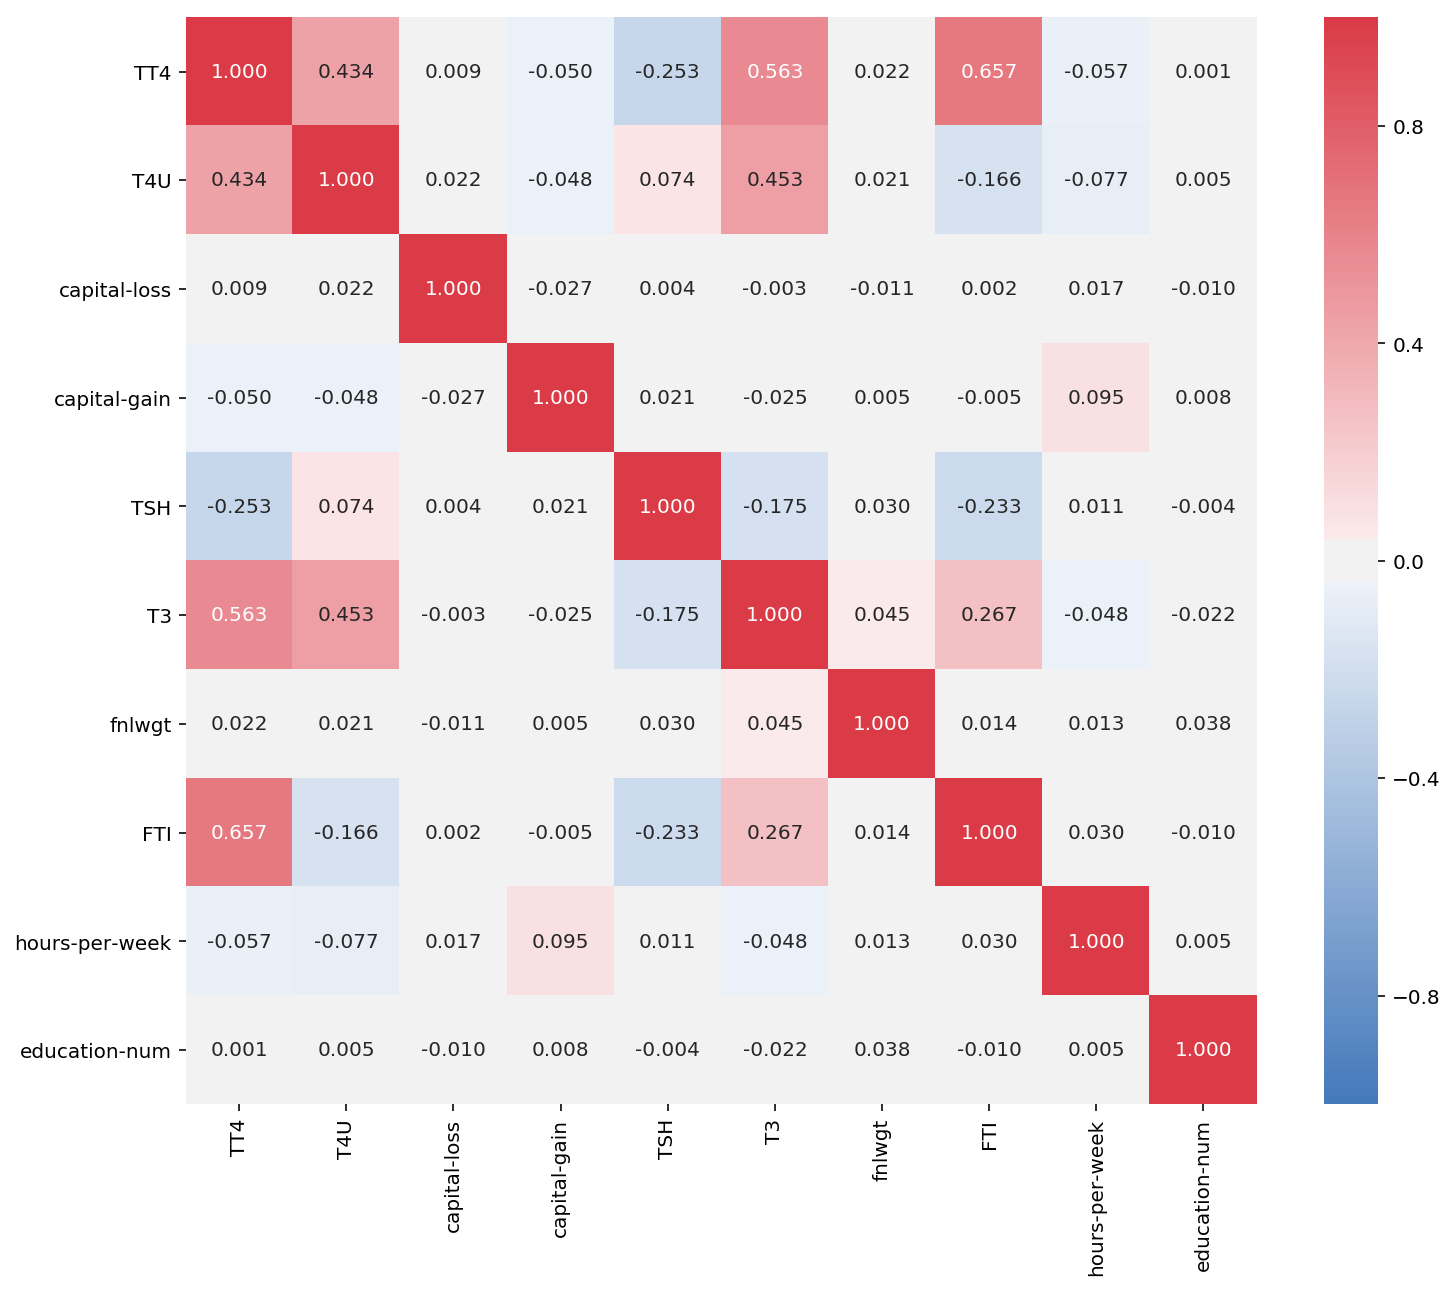

In [166]:
fig, ax = plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(df2.corr(), annot=True, cmap=cmap, fmt=".3f", vmin=-1.0, vmax=1.0)

Heatmap shows there are no significant correlations between numerical attributes. Only pure red and strong blue are indicating strong correlations. Let's check also pairplot, grouped by our *class_status* attribute. This plot is useful when finding possible divisions of predicted attribute for each 2 attributes:

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


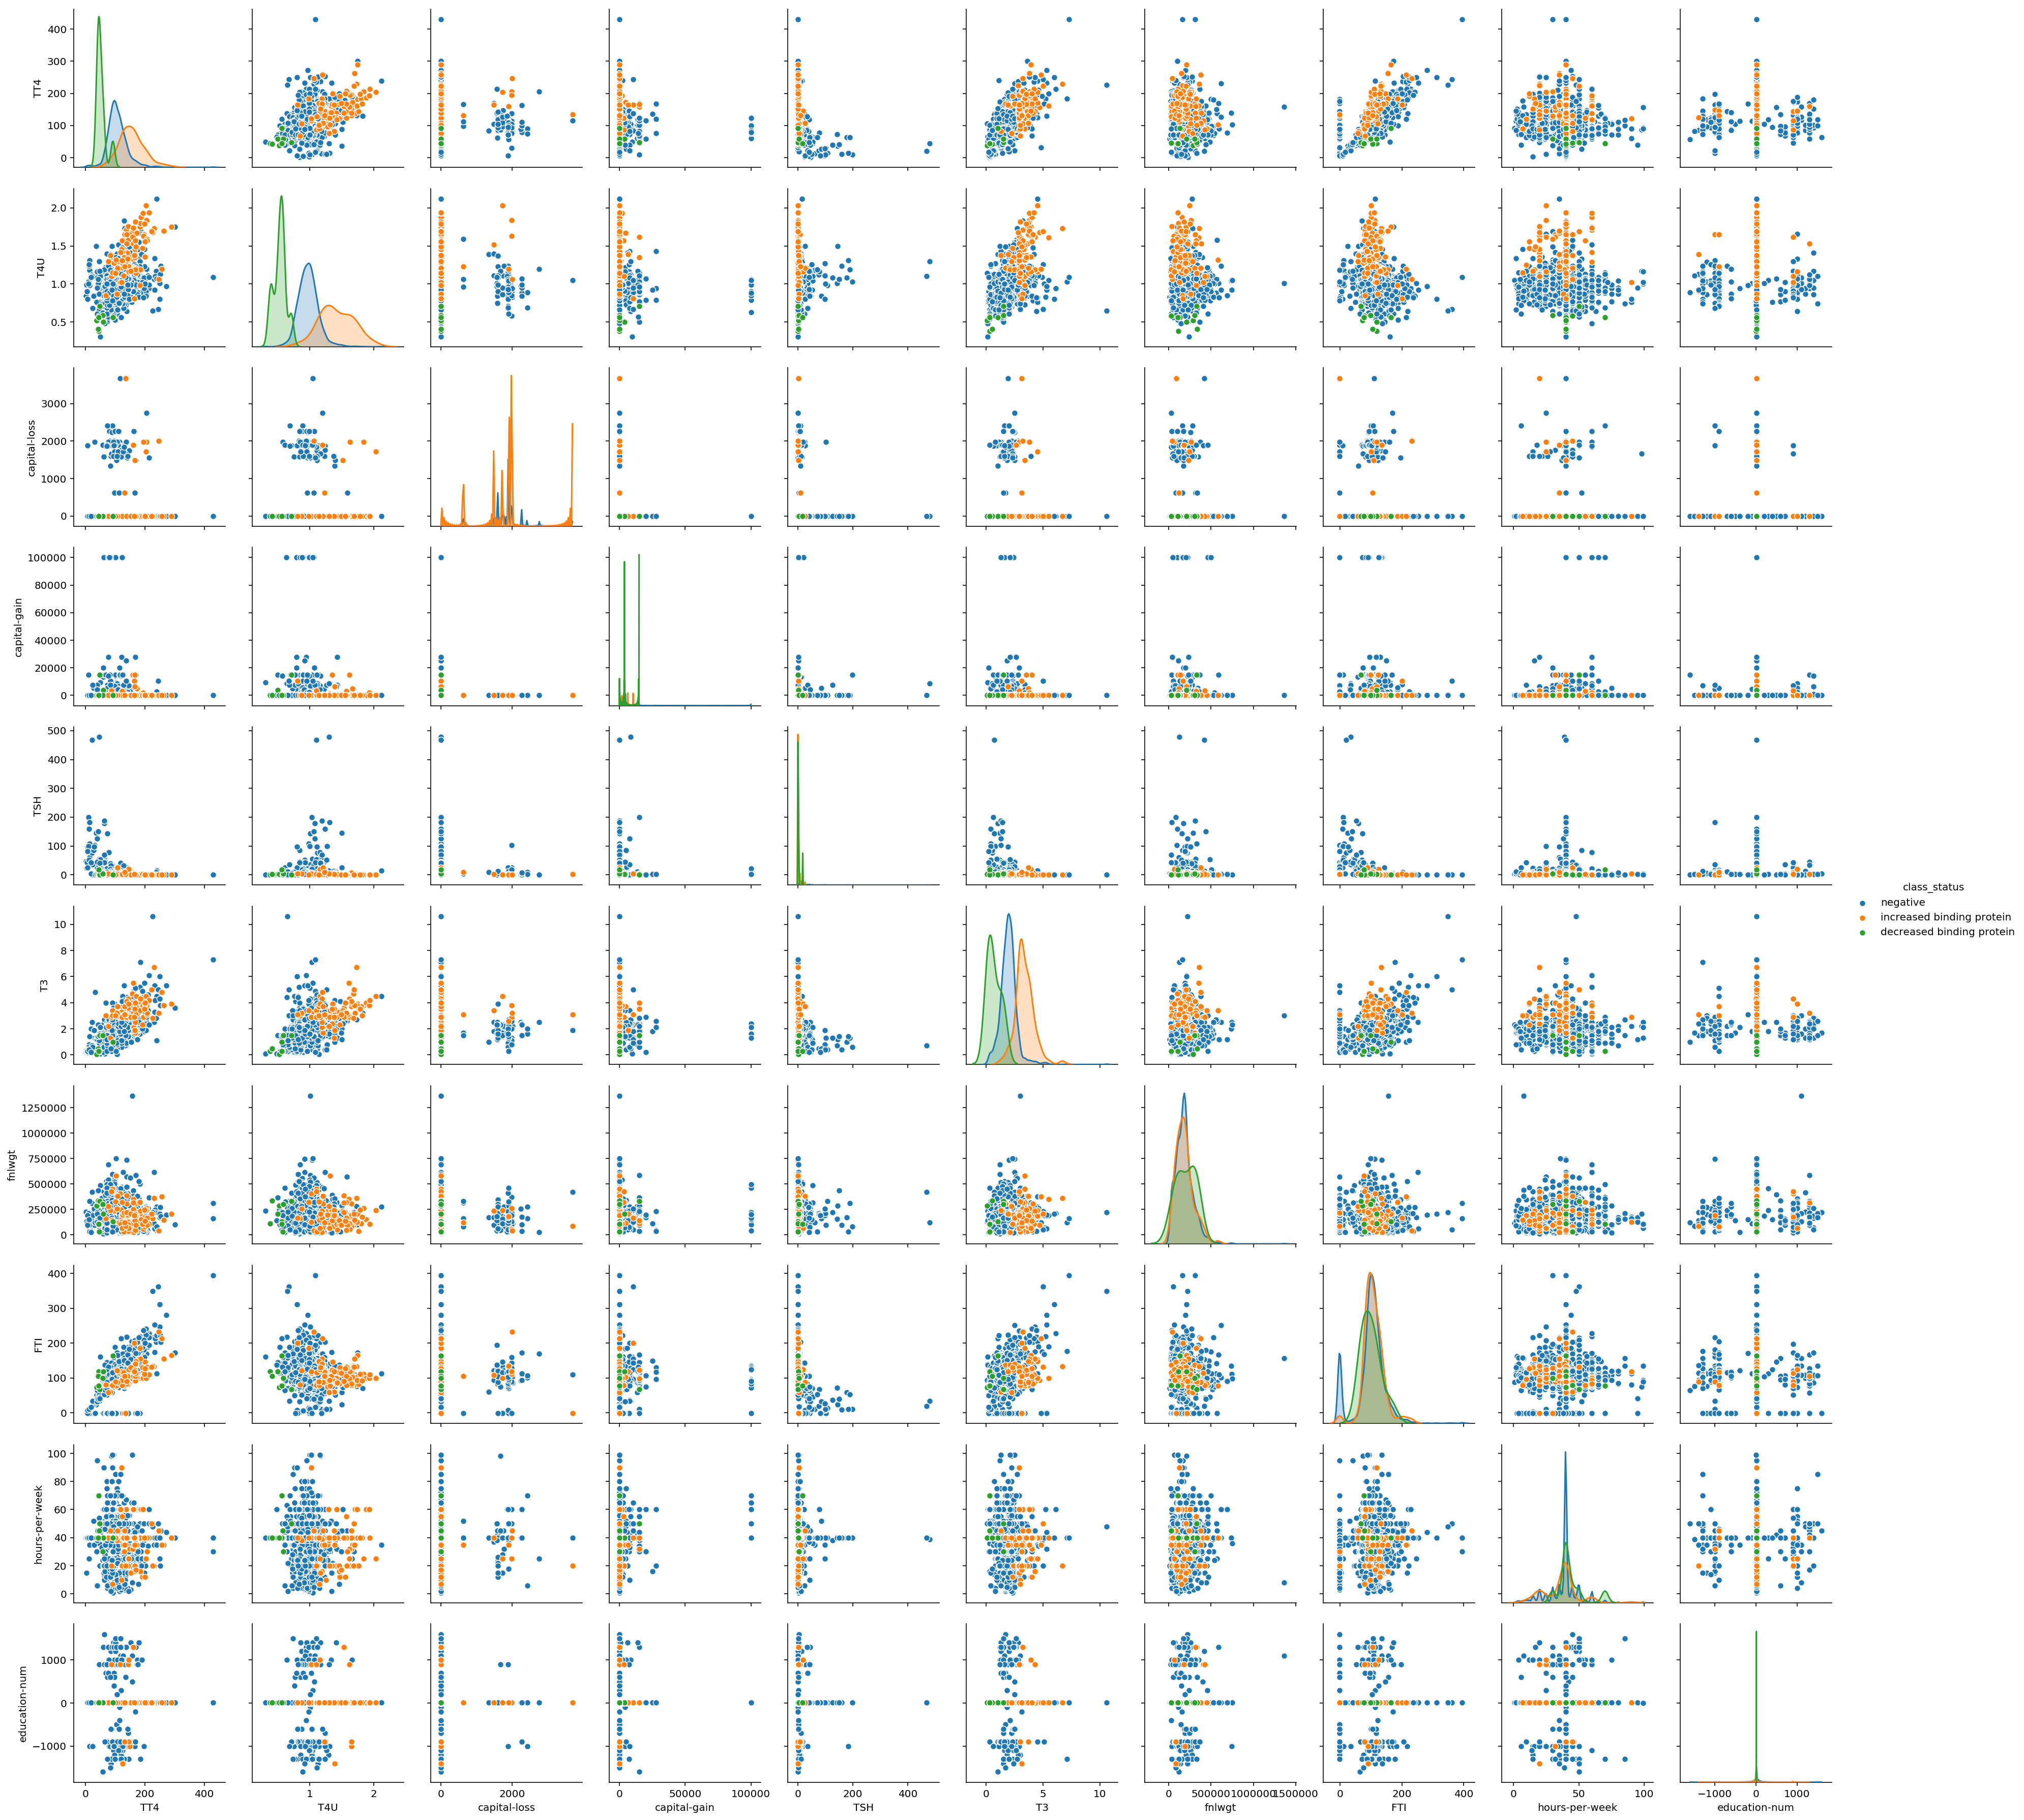

In [167]:
sns.pairplot(data=df2, hue='class_status')

## TO-DO & Notes

#### Identified problems in data
* duplicates (more records with same name and address)
* some outliers (TSH)
* multiple columns packed into one
* more interpretations for one values (typical true and false values as t, f, t.1, ...)
* columns with just one value (TBG measured)

#### Preprocessing
* merge both datasets
* gender can be identified by Name - API or Naive Bayes Classifier for gender identification
* unify date_of_birth to one format